<left> <font size=5 style='font-family:Courier New' color='Blue' > **Project 2 - Supervised Learning (Regression):** 
<left> <font size=5 style='font-family:Courier New' color='Green' > **Cars 4 You**    

<left> <font size=6 style='font-family:Courier New' color='Orange' > **Objective:** 
<br> <left> <font size=3 style='font-family:Courier New' color='Black'>
Predicting the Price of Used Cars...

<left> <font size=6 style='font-family:Courier New' color='Orange' > **Data Dictionary:** 
<left> <font size=3 style='font-family:Courier New' color='Black'>
<br> <left> <font size=3 style='font-family:Courier New' color='Black'> 1. **S.No.**: Serial number.
<br> <left> <font size=3 style='font-family:Courier New' color='Black'> 2. **Name**: Name of the car which includes brand name and model name.
<br> <left> <font size=3 style='font-family:Courier New' color='Black'> 3. **Location**: Location in which the car is being sold or is available for purchase (cities).
<br> <left> <font size=3 style='font-family:Courier New' color='Black'> 4. **Year**: Manufacturing year of the car.
<br> <left> <font size=3 style='font-family:Courier New' color='Black'> 5. **Kilometers_driven**: The total kilometers (a unit used to measure length or distance) driven in the car by the previous owner(s).
<br> <left> <font size=3 style='font-family:Courier New' color='Black'> 6. **Fuel_Type**: The type of fuel used by the car (Petrol, Diesel, Electric, CNG, LPG).
<br> <left> <font size=3 style='font-family:Courier New' color='Black'> 7. **Transmission**: The type of transmission used by the car (Automatic/Manual).
<br> <left> <font size=3 style='font-family:Courier New' color='Black'> 8. **Owner**: Type of ownership. 
<br> <left> <font size=3 style='font-family:Courier New' color='Black'> 9. **Mileage**: The standard mileage offered by the car company in kmpl or km/kg.
<br> <left> <font size=3 style='font-family:Courier New' color='Black'> 10. **Engine**: The displacement volume of the engine in CC.
<br> <left> <font size=3 style='font-family:Courier New' color='Black'> 11. **Power**: The maximum power of the engine in bhp.
<br> <left> <font size=3 style='font-family:Courier New' color='Black'> 12. **Seats**: The number of seats in the car.
<br> <left> <font size=3 style='font-family:Courier New' color='Black'> 13. **New_Price**: The price of a new car of the same model in INR Lakhs (1 Lakh INR = 100,000 INR)
<br> <left> <font size=3 style='font-family:Courier New' color='Black'> 14. **Price**: The price of the used car in INR Lakhs.

<left> <font size=6 style='font-family:Courier New' color='Orange' > **Case Understanding:** 
<br> <left> <font size=3 style='font-family:Courier New' color='Black'> As we are going to build a Linear Regression Model to predict the prices of used cars, the Price Column will be considered as the Dependent (Target) Varieble while all the remaining columns will be possible Independent (Predictor) Variables.
<br> <left> <font size=3 style='font-family:Courier New' color='Black'> Except the S.No. Column which has no impact on cars characteristics, there are 12 Features need processing in order to have a clean data useful to build a good model and to infer insights and recommendations.
<br> <left> <font size=3 style='font-family:Courier New' color='Black'> Initially, we might focus on the Re-selling Price (Used Car Price) as the most influencing factor on market trends; In addition, we might analyze the cities to infer indicators about the richness of their residents.
<br> <left> <font size=3 style='font-family:Courier New' color='Black'>Furthermore, we will assume that what is the most available in the market means it's the most popular; Hence, we will analyize the customers preferences in terms of Fuel Type, Transmission, Enhine Specs, ...
<br> <left> <font size=3 style='font-family:Courier New' color='Black'>Finally, we have a well known facts from the real world which will be our guidance in the coming analysis, such facts include but not limited to:
<br> <left> <font size=3 style='font-family:Courier New' color='Black'> **-** We can segregate the cars brands based on the Manufacturing Country.
<br> <left> <font size=3 style='font-family:Courier New' color='Black'> **-** Cars with Larger Engine Displacement consume more fuel than others which result in lower Mileage.
<br> <left> <font size=3 style='font-family:Courier New' color='Black'> **-** Also, Cars with Larger Engine Displacement are more powerful in term of Horse Powers.
<br> <left> <font size=3 style='font-family:Courier New' color='Black'> **-** Cars with 2 Seats represent the sport cars, 4 Seats represents the luxury cars (Where the back seat is separated), 5 Seats represents the Sedan/SUV Cars, 6-10 Seats represents the Off-Road/Family Cars. 

<left> <font size=6 style='font-family:Courier New' color='Orange' > **1. Prework:**  

In [1]:
# Start with importing the necessary libraries:
# 1. Data Reading and Manipulating:
import numpy as np
import pandas as pd

# 2. Data Visualization:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

# 3. Displaying all Columns and 200 Rows:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 200)

# 4. Linear Regression - Building, Splitting, and Evaluating:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 5. Grid Settings:
sns.set_style(style = 'darkgrid')

# 6. Supress Warning Library Module:
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Loading the csv file and assign it to a variable df:

df = pd.read_csv('Project_02_SupervisedLearning_Regression_Cars4You_Code_Dataset.csv')

<left> <font size=6 style='font-family:Courier New' color='Orange' > **2. Sanity Check:**  

In [3]:
# Ensuring that everything is working as expected by displaying a sample of random 10 Data Rows:

np.random.seed(1)
df.sample(n=10).style.set_properties(**{'color': 'green'})

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
2397,2397,Ford EcoSport 1.5 Petrol Trend,Kolkata,2016,21460,Petrol,Manual,First,17.0 kmpl,1497 CC,121.36 bhp,5.000000,9.470000,6.000000
3777,3777,Maruti Wagon R VXI 1.2,Kochi,2015,49818,Petrol,Manual,First,21.5 kmpl,1197 CC,81.80 bhp,5.000000,5.440000,4.110000
4425,4425,Ford Endeavour 4x2 XLT,Hyderabad,2007,130000,Diesel,Manual,First,13.1 kmpl,2499 CC,141 bhp,7.000000,35.290000,6.000000
3661,3661,Mercedes-Benz E-Class E250 CDI Avantgrade,Coimbatore,2016,39753,Diesel,Automatic,First,13.0 kmpl,2143 CC,201.1 bhp,5.000000,86.970000,35.280000
4514,4514,Hyundai Xcent 1.2 Kappa AT SX Option,Kochi,2016,45560,Petrol,Automatic,First,16.9 kmpl,1197 CC,82 bhp,5.000000,8.230000,6.340000
599,599,Toyota Innova Crysta 2.8 ZX AT,Coimbatore,2019,40674,Diesel,Automatic,First,11.36 kmpl,2755 CC,171.5 bhp,7.000000,28.050000,24.820000
186,186,Mercedes-Benz E-Class E250 CDI Avantgrade,Bangalore,2014,37382,Diesel,Automatic,First,13.0 kmpl,2143 CC,201.1 bhp,5.000000,86.970000,32.000000
305,305,Audi A6 2011-2015 2.0 TDI Premium Plus,Kochi,2014,61726,Diesel,Automatic,First,17.68 kmpl,1968 CC,174.33 bhp,5.000000,67.100000,20.770000
4582,4582,Hyundai i20 1.2 Magna,Kolkata,2011,36000,Petrol,Manual,First,18.5 kmpl,1197 CC,80 bhp,5.000000,10.250000,2.500000
5434,5434,Honda WR-V Edge Edition i-VTEC S,Kochi,2019,13913,Petrol,Manual,First,17.5 kmpl,1199 CC,88.7 bhp,5.000000,9.360000,8.200000


In [4]:
# Examining the No. of Data Rows and Columns:

print('\033[1m', '\033[92m' , 'Cars4U Dataset contins' , df.shape[0] , 'Data Rows and' , df.shape[1] , 'columns.')

  Cars4U Dataset contins 7253 Data Rows and 14 columns.


In [5]:
# Examining the Dataset Information and Data Types:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   object 
 9   Engine             7207 non-null   object 
 10  Power              7078 non-null   object 
 11  Seats              7200 non-null   float64
 12  New_Price          7253 non-null   float64
 13  Price              6019 non-null   float64
dtypes: float64(3), int64(3), object(8)
memory usage: 793.4+ KB


In [6]:
# Displayinh the No. of Non-Null/Null/Zero Entries in the Columns:

def summary(x):
    column = x.columns.values.tolist()
    non_null = [x[i].notnull().sum() for i in column]
    null = [x[i].isnull().sum() for i in column]
    zero = [x[i].eq(0).sum() for i in column]
    summary_df = pd.DataFrame(data = {'Column Name':column , 'Non-Null Entries':non_null , 'Null Entries':null , 'Zero Entries':zero})
    return summary_df
        
summary(df).style.set_properties(**{'color': 'green'})

,Column Name,Non-Null Entries,Null Entries,Zero Entries
0,S.No.,7253,0,1
1,Name,7253,0,0
2,Location,7253,0,0
3,Year,7253,0,0
4,Kilometers_Driven,7253,0,0
5,Fuel_Type,7253,0,0
6,Transmission,7253,0,0
7,Owner_Type,7253,0,0
8,Mileage,7251,2,0
9,Engine,7207,46,0


<left> <font size=5 style='font-family:Courier New' color='Grey'> **2.1 Observations:**
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **1.** Dataset consists of 7,253 Data Rows and 14 Columns.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **2.** There are 5 Columns with Missing Values (Mileage, Engine, Power, Seats, and Price).
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **3.** Serial No. Column looks like a duplicate to Index Column; we might drop it as it has no effect on our analysis.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **4.** Both Name and Location Columns have an Object Type which make sense.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **5.** The presence of both Brand and Model Names in the same column is non-useful and making it difficult to use such column to infer relationships; For now, we will keep it untouched as it will be very helpful in imputing the missing values, then only the Brand Name will be extracted.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **6.** Fuel_Type, Transmission, and	Owner_Type Columsn could be converted to Category Type.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **7.** Mileage,	Engine,	and Power Columns need some analysis to standardize the unit of measurement in each and to convert them to Numerical columns.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **8.** Null/Zero values in Seats column must be treated; Furthermore, more Zero Values are expected to occur in other columns (Numerical Nature) after processing and will be handled accordingly.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **9.** There is a need to change the format of New_price and Price columns to be shown in INR instead of Lakh INR; Keeping it without change will result in MAPE being calculated to **inf** when performing Log Transformation on these columns.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **10.** Missing Values in the Price Column (Dependent Variable) must be dropped as such missed values will cause a bias in the results/model. Furthermore, it indicate the absence of Result which we're actually trying to build a model to predict it!

In [7]:
'''
We will investigate the values inside some object columns which - by sense - shall have 
a specific categories/reasonable ranges:
'''

var = ['Location' , 'Fuel_Type' , 'Transmission' , 'Owner_Type' , 'Seats'] 
for i in var:
    print('\033[1m' , '\033[92m' , f'{i}: {df[i].value_counts().count()} Distinct Entries' , '\033[0m' , '\033[92m' , )
    print(df[i].value_counts())
    print("-"*40)

  Location: 11 Distinct Entries  
Mumbai        949
Hyderabad     876
Coimbatore    772
Kochi         772
Pune          765
Delhi         660
Kolkata       654
Chennai       591
Jaipur        499
Bangalore     440
Ahmedabad     275
Name: Location, dtype: int64
----------------------------------------
  Fuel_Type: 5 Distinct Entries  
Diesel      3852
Petrol      3325
CNG           62
LPG           12
Electric       2
Name: Fuel_Type, dtype: int64
----------------------------------------
  Transmission: 2 Distinct Entries  
Manual       5204
Automatic    2049
Name: Transmission, dtype: int64
----------------------------------------
  Owner_Type: 4 Distinct Entries  
First             5952
Second            1152
Third              137
Fourth & Above      12
Name: Owner_Type, dtype: int64
----------------------------------------
  Seats: 9 Distinct Entries  
5.0     6047
7.0      796
8.0      170
4.0      119
6.0       38
2.0       18
10.0       8
9.0        3
0.0        1
Name: Seats, dt

<left> <font size=5 style='font-family:Courier New' color='Grey'> **2.2 Observations:**
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **1.** 11 valid City Names have been found in Location Column; Mumbai represents the city with the highest No. of cars. 
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **2.** 5 valid Types of Fuel have been found: Diesel, Petrol, CNG (Compressed Natural Gas), LPG (Liquefied petroleum gas ), and Electric; Diesel and Petrol Cars dominating the market of used cars.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **3.** 2 Types of Transmission have been found: Manual and Automatic; Manual Transmission cars are the most famous.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **4.** 4 Levels of owning have been found: First, Second, Third, and Forth & Above; Most of the cars owned one time only before reselling.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **5.** At first glance, it might somehow confused to know that there are cars with 9/10 seats; Filtering out such cars using df[df['Seats']>=9] then search for them using    www.cardekho.com make everything comfortable and believable.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **6.** Most of the Cars are Sedan with 5 Seats. it's the most famous car type in the market.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **7.** 1 Car with 0.0 Seats have been found in Seats Column! We'll try to impute it to reflect the accurate No. of seats if possible. Furthermore, similar Zero entries may be found in Mileage, Power, and Engine Columns after converting.

In [8]:
# It's the time to verify statistics of all Columns:

df.describe(include='all').T.style.set_properties(**{'color': 'green'})

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
S.No.,7253.000000,nan,nan,nan,3626.000000,2093.905084,0.000000,1813.000000,3626.000000,5439.000000,7252.000000
Name,7253,2041,Mahindra XUV500 W8 2WD,55,nan,nan,nan,nan,nan,nan,nan
Location,7253,11,Mumbai,949,nan,nan,nan,nan,nan,nan,nan
Year,7253.000000,nan,nan,nan,2013.365366,3.254421,1996.000000,2011.000000,2014.000000,2016.000000,2019.000000
Kilometers_Driven,7253.000000,nan,nan,nan,58699.063146,84427.720583,171.000000,34000.000000,53416.000000,73000.000000,6500000.000000
Fuel_Type,7253,5,Diesel,3852,nan,nan,nan,nan,nan,nan,nan
Transmission,7253,2,Manual,5204,nan,nan,nan,nan,nan,nan,nan
Owner_Type,7253,4,First,5952,nan,nan,nan,nan,nan,nan,nan
Mileage,7251,450,17.0 kmpl,207,nan,nan,nan,nan,nan,nan,nan
Engine,7207,150,1197 CC,732,nan,nan,nan,nan,nan,nan,nan


<left> <font size=5 style='font-family:Courier New' color='Grey'> **2.3 Observations:**
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **1.** As Seen, 2041 distinct cars are found, Mahindra XUV500 W8 2WD Car has the most availability with 55 units.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **2.** Mumbai represents the city with the largest No. of used cars (949).
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **3.** Car's Year of Manufacturing vary between 1996 and 2019. 
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **4.** A very extreme value(s) have been noticed in Kilometers_Driven with 6.5 Million Km; Further analysis are required.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **5.** Fuel Type (Diesel), Transmission (Manual), and Owner_Type (First) represents the highest categories.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **6.** No useful info can be derived from Mileage, Engine, and Power Columns as they need more analysis to change them into Numeric Data Type.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **7.** Seats Column has been already investigated   and did not show any abnormality except some missing values and 1 car with 0 Seats.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **8.** Again, both New_Price and Price Columns show extreme value(s), Further analysis are required.

In [9]:
'''
Although identical cars may occur due to dataset nature, we will examine the Dataset against duplicate Data Rows:
To get accurate results, 1st Column (Serial No.) must be excluded as it does not belong to car characteristics:
'''

df.loc[:, df.columns != 'S.No.'].duplicated().sum()

1

In [10]:
# Since we have 1 duplicate Data Row, we will display it to decide whether to remove it or not:

df[df.loc[:, df.columns != 'S.No.'].duplicated(keep = False)].style.set_properties(**{'color': 'green'})

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
6498,6498,Honda City 1.5 E MT,Mumbai,2010,52000,Petrol,Manual,First,17.0 kmpl,1497 CC,118 bhp,5.000000,13.580000,nan
6582,6582,Honda City 1.5 E MT,Mumbai,2010,52000,Petrol,Manual,First,17.0 kmpl,1497 CC,118 bhp,5.000000,13.580000,nan


<left> <font size=5 style='font-family:Courier New' color='Grey'> **2.4 Observations:**
<br> <left> <font size=3 style='font-family:Courier New' color='black'> Although both cars have the same characteristics, we can't just decide - roughly - to drop one of them as such duplication might occur.

<left> <font size=3 style='font-family:Courier New' color='black'> Furthermore, there is no unique identifier like the Chassis Number to build an assumption that both are in fact a single but repeated observation.
    
<left> <font size=3 style='font-family:Courier New' color='black'> Eventually, leaving the observations as it is might be the most appropriate decision.

<left> <font size=6 style='font-family:Courier New' color='Orange' > **3. Data Preprocessing:**  

In [11]:
'''
We will move over all columns one by one and see what we can do with each:
Starting with S.No. Column, It looks like this Column is identical to the Index Column.
To verify that, we will compare each index value with the corresponding value in S.No. Column.
If no differences are found, then we can safely drop the S.No. Column:
'''

non_matching=0
for index, row in df.iterrows(): 
    if index != row['S.No.']:
        non_matching += 1       
print('\033[1m' , '\033[92m' , f'There are {non_matching} Mismatch Entries between Index and S.No. Columns!')

  There are 0 Mismatch Entries between Index and S.No. Columns!


In [12]:
# Since both Index and S.No. Columns are identical, we will drop the S.No. Column:

df.drop(['S.No.'] , axis = 1 , inplace=True)

In [13]:
# Ensuring that everything is working as expected after dropping the S.No. Column by displaying the sample again:

df.sample(n=10).style.set_properties(**{'color': 'green'})

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
2245,Maruti Wagon R VXI 1.2,Mumbai,2015,55000,Petrol,Manual,First,21.5 kmpl,1197 CC,81.80 bhp,5.000000,5.880000,3.100000
6407,Maruti Swift LXI Option,Kochi,2017,62889,Petrol,Manual,First,20.4 kmpl,1197 CC,81.80 bhp,5.000000,7.880000,nan
1226,Toyota Corolla Altis 1.8 VL CVT,Delhi,2017,21000,Petrol,Automatic,First,14.28 kmpl,1798 CC,138.03 bhp,5.000000,23.250000,18.000000
533,Honda City 1.5 V AT,Mumbai,2010,69000,Petrol,Automatic,Second,16.8 kmpl,1497 CC,118 bhp,5.000000,13.580000,2.850000
6330,Hyundai i20 Asta 1.2,Kolkata,2015,33000,Petrol,Manual,First,18.6 kmpl,1197 CC,81.83 bhp,5.000000,10.250000,nan
5931,Maruti Ertiga VXI,Mumbai,2012,52500,Petrol,Manual,Second,16.02 kmpl,1373 CC,93.7 bhp,7.000000,11.270000,5.250000
2784,Nissan Micra Diesel XV,Hyderabad,2011,86732,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5.000000,9.470000,3.600000
5180,Skoda Superb Elegance 1.8 TSI AT,Bangalore,2009,75000,Petrol,Automatic,Second,13.7 kmpl,1798 CC,157.75 bhp,5.000000,33.360000,4.950000
2722,Volkswagen Ameo 1.5 TDI Highline,Kochi,2018,31426,Diesel,Manual,First,21.66 kmpl,1498 CC,108.62 bhp,5.000000,9.720000,7.900000
5322,Hyundai Grand i10 CRDi Sportz,Ahmedabad,2016,30000,Diesel,Manual,First,24.0 kmpl,1120 CC,70 bhp,5.000000,7.450000,5.500000


In [14]:
'''
First Step in Data Processing is to drop the Null Entries in the Dependent Column (Price).
The occurance of such Null Entries will cause a Bias in our Model. Also, how to predict a Price if the history of the Price itself is missed!
'''

df.dropna(subset=["Price"], inplace=True)
df.reset_index(inplace=True, drop=True)
summary(df).style.set_properties(**{'color': 'green'})

,Column Name,Non-Null Entries,Null Entries,Zero Entries
0,Name,6019,0,0
1,Location,6019,0,0
2,Year,6019,0,0
3,Kilometers_Driven,6019,0,0
4,Fuel_Type,6019,0,0
5,Transmission,6019,0,0
6,Owner_Type,6019,0,0
7,Mileage,6017,2,0
8,Engine,5983,36,0
9,Power,5876,143,0


In [15]:
# Ensuring that everything is working as expected after resetting the Index Column by displaying the 1st 10 Data Rows:

df.head(10).style.set_properties(**{'color': 'green'})

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.000000,5.510000,1.750000
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.000000,16.060000,12.500000
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.000000,8.610000,4.500000
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.000000,11.270000,6.000000
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.000000,53.140000,17.740000
5,Hyundai EON LPG Era Plus Option,Hyderabad,2012,75000,LPG,Manual,First,21.1 km/kg,814 CC,55.2 bhp,5.000000,10.250000,2.350000
6,Nissan Micra Diesel XV,Jaipur,2013,86999,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5.000000,9.470000,3.500000
7,Toyota Innova Crysta 2.8 GX AT 8S,Mumbai,2016,36000,Diesel,Automatic,First,11.36 kmpl,2755 CC,171.5 bhp,8.000000,21.000000,17.500000
8,Volkswagen Vento Diesel Comfortline,Pune,2013,64430,Diesel,Manual,First,20.54 kmpl,1598 CC,103.6 bhp,5.000000,13.230000,5.200000
9,Tata Indica Vista Quadrajet LS,Chennai,2012,65932,Diesel,Manual,Second,22.3 kmpl,1248 CC,74 bhp,5.000000,7.630000,1.950000


In [16]:
'''
Moving to Name Column; It's quite obvious that this column is untidy and contains a distracting information.
To make it meaningful and have an impact when proceeding with analysis, we will extract the Brand only while keeping 
the original column as it's for some imputation work, we will drop it later on:
'''

def model(x):
    if isinstance(x , str):
        list = x.split(' ')
        return list[0]
    else:
        return np.nan
df['Brand'] = df['Name'].apply(model).str.strip().str.title()

In [17]:
# A new Brand Column has been created, lets display its contents:

df['Brand'].unique()

array(['Maruti', 'Hyundai', 'Honda', 'Audi', 'Nissan', 'Toyota',
       'Volkswagen', 'Tata', 'Land', 'Mitsubishi', 'Renault',
       'Mercedes-Benz', 'Bmw', 'Mahindra', 'Ford', 'Porsche', 'Datsun',
       'Jaguar', 'Volvo', 'Chevrolet', 'Skoda', 'Mini', 'Fiat', 'Jeep',
       'Smart', 'Ambassador', 'Isuzu', 'Force', 'Bentley', 'Lamborghini'],
      dtype=object)

In [18]:
'''
As seen in above series, 3 brands need further processing as below:
Mercedes-Benz: Change to Mercedes as it's more than enough to describe the Brand.
Land: Change it back to Land Rover (Rover has been trimmed when creating the Brand Column).              
Mini: Change it back to Mini Cooper (Cooper has been trimmed when creating the Brand Column).
Then, we will view the new Entries after modifications.
'''

df['Brand'] = df['Brand'].replace(['Mercedes-Benz','Land','Mini'],\
                                 ['Mercedes','Land Rover','Mini Cooper'])
df['Brand'].unique()

array(['Maruti', 'Hyundai', 'Honda', 'Audi', 'Nissan', 'Toyota',
       'Volkswagen', 'Tata', 'Land Rover', 'Mitsubishi', 'Renault',
       'Mercedes', 'Bmw', 'Mahindra', 'Ford', 'Porsche', 'Datsun',
       'Jaguar', 'Volvo', 'Chevrolet', 'Skoda', 'Mini Cooper', 'Fiat',
       'Jeep', 'Smart', 'Ambassador', 'Isuzu', 'Force', 'Bentley',
       'Lamborghini'], dtype=object)

In [19]:
'''
Lets change the Data Type of below Columns from Object to Category:
1. Fuel_Type
2. Transmission
3. Owner_Type
'''

columns = ['Fuel_Type', 'Transmission', 'Owner_Type']
for column in columns:
    df[column] = df[column].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Name               6019 non-null   object  
 1   Location           6019 non-null   object  
 2   Year               6019 non-null   int64   
 3   Kilometers_Driven  6019 non-null   int64   
 4   Fuel_Type          6019 non-null   category
 5   Transmission       6019 non-null   category
 6   Owner_Type         6019 non-null   category
 7   Mileage            6017 non-null   object  
 8   Engine             5983 non-null   object  
 9   Power              5876 non-null   object  
 10  Seats              5977 non-null   float64 
 11  New_Price          6019 non-null   float64 
 12  Price              6019 non-null   float64 
 13  Brand              6019 non-null   object  
dtypes: category(3), float64(3), int64(2), object(6)
memory usage: 535.5+ KB


In [20]:
'''
Mileage Column appears as String while it must be of Numerical Data Type.
To do so, we will strip out the unites and convert the results to Float Data Type.
Note: As instructed in Project FAQs, no need to do any type of conversion between units. Furthermore, these isntructions
are logic since each Fuel_Type has different unit to measuere (Liter for Liquid, Kg for Gas).
'''

def mileage_stripper(x):
    if isinstance(x , str):
        if x.endswith('km/kg') or x.endswith('kmpl'):
            return float(x.replace('km/kg','').replace('kmpl',''))
    else:
            return np.nan
df['Mileage'] = df['Mileage'].apply(mileage_stripper)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Name               6019 non-null   object  
 1   Location           6019 non-null   object  
 2   Year               6019 non-null   int64   
 3   Kilometers_Driven  6019 non-null   int64   
 4   Fuel_Type          6019 non-null   category
 5   Transmission       6019 non-null   category
 6   Owner_Type         6019 non-null   category
 7   Mileage            6017 non-null   float64 
 8   Engine             5983 non-null   object  
 9   Power              5876 non-null   object  
 10  Seats              5977 non-null   float64 
 11  New_Price          6019 non-null   float64 
 12  Price              6019 non-null   float64 
 13  Brand              6019 non-null   object  
dtypes: category(3), float64(4), int64(2), object(5)
memory usage: 535.5+ KB


In [21]:
'''
The same stripping method is required for Engine Column as it appears as String while it must be of Numerical Data Type.
To do so, we will strip out the unites and convert the results to Float Data Type.
'''

def engine_stripper(x):
    if isinstance(x , str):
        if x.endswith('CC'):
            return float(x.replace('CC',''))
    else:
            return np.nan
df['Engine'] = df['Engine'].apply(engine_stripper)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Name               6019 non-null   object  
 1   Location           6019 non-null   object  
 2   Year               6019 non-null   int64   
 3   Kilometers_Driven  6019 non-null   int64   
 4   Fuel_Type          6019 non-null   category
 5   Transmission       6019 non-null   category
 6   Owner_Type         6019 non-null   category
 7   Mileage            6017 non-null   float64 
 8   Engine             5983 non-null   float64 
 9   Power              5876 non-null   object  
 10  Seats              5977 non-null   float64 
 11  New_Price          6019 non-null   float64 
 12  Price              6019 non-null   float64 
 13  Brand              6019 non-null   object  
dtypes: category(3), float64(5), int64(2), object(4)
memory usage: 535.5+ KB


In [22]:
'''
Again, The Power Column appears as String while it must be of Numerical Data Type
To do so, we will strip out the unites and convert the results to Float Data Type
'''

def power_stripper(x):
    if isinstance(x , str):
        if x.endswith('bhp'):
            return float(x.replace('bhp',''))
    else:
            return np.nan
df['Power'] = df['Power'].apply(power_stripper)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Name               6019 non-null   object  
 1   Location           6019 non-null   object  
 2   Year               6019 non-null   int64   
 3   Kilometers_Driven  6019 non-null   int64   
 4   Fuel_Type          6019 non-null   category
 5   Transmission       6019 non-null   category
 6   Owner_Type         6019 non-null   category
 7   Mileage            6017 non-null   float64 
 8   Engine             5983 non-null   float64 
 9   Power              5876 non-null   float64 
 10  Seats              5977 non-null   float64 
 11  New_Price          6019 non-null   float64 
 12  Price              6019 non-null   float64 
 13  Brand              6019 non-null   object  
dtypes: category(3), float64(6), int64(2), object(3)
memory usage: 535.5+ KB


In [23]:
'''
Finally, we will change the units in both New_Price and Price Columns to be in INR instead of Lakh INR:
Keeping both Price and Price_New in Lakh INR may result in MAPE being calculated to inf when performing Log Trans!
'''

def unit_multiplier(x):
    if isinstance(x , float):
        return float(x*100000)
    else:
            return np.nan
df['Price'] = df['Price'].apply(unit_multiplier)
df['New_Price'] = df['New_Price'].apply(unit_multiplier)
df.sample(n=10).style.set_properties(**{'color': 'green'})

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Brand
5035,Ford Figo Petrol EXI,Bangalore,2010,78400,Petrol,Manual,Second,15.600000,1196.000000,70.000000,5.000000,765000.000000,275000.000000,Ford
1907,Toyota Qualis FS B3,Bangalore,2002,63000,Diesel,Manual,Third,13.100000,2446.000000,75.000000,10.000000,2401000.000000,365000.000000,Toyota
3693,Hyundai Xcent 1.1 CRDi S,Mumbai,2016,63141,Diesel,Manual,Second,24.400000,1120.000000,71.000000,5.000000,823000.000000,450000.000000,Hyundai
4092,Ford Classic 1.4 Duratorq Titanium,Chennai,2014,83500,Diesel,Manual,Second,19.680000,1399.000000,67.000000,5.000000,1168500.000000,300000.000000,Ford
3130,Volkswagen Vento Sport 1.2 TSI AT,Mumbai,2014,61529,Petrol,Automatic,First,18.190000,1197.000000,103.500000,5.000000,1323000.000000,565000.000000,Volkswagen
4095,Audi A4 3.0 TDI Quattro,Coimbatore,2015,35463,Diesel,Automatic,First,14.940000,2967.000000,241.400000,5.000000,5314000.000000,2502000.000000,Audi
633,Audi Q3 35 TDI Quattro Premium,Hyderabad,2015,61000,Diesel,Automatic,First,15.730000,1968.000000,174.330000,5.000000,4480000.000000,2500000.000000,Audi
4321,Mercedes-Benz E-Class 2015-2017 E250 CDI Avantgarde,Coimbatore,2016,65405,Diesel,Automatic,First,13.000000,2143.000000,204.000000,5.000000,8697000.000000,3273000.000000,Mercedes
1473,Toyota Fortuner 4x2 4 Speed AT,Hyderabad,2012,152000,Diesel,Automatic,First,11.500000,2982.000000,169.000000,7.000000,3717000.000000,1650000.000000,Toyota
2185,Maruti Vitara Brezza ZDi Plus,Ahmedabad,2017,80000,Diesel,Manual,First,24.300000,1248.000000,88.500000,5.000000,1091000.000000,800000.000000,Maruti


In [24]:
# Since the Transformation is done and all the Columns have consistent Data Types, we can display the statistics again:

df.describe(include='all').T.style.set_properties(**{'color': 'green'})

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Name,6019,1876,Mahindra XUV500 W8 2WD,49,nan,nan,nan,nan,nan,nan,nan
Location,6019,11,Mumbai,790,nan,nan,nan,nan,nan,nan,nan
Year,6019.000000,nan,nan,nan,2013.358199,3.269742,1998.000000,2011.000000,2014.000000,2016.000000,2019.000000
Kilometers_Driven,6019.000000,nan,nan,nan,58738.380296,91268.843206,171.000000,34000.000000,53000.000000,73000.000000,6500000.000000
Fuel_Type,6019,5,Diesel,3205,nan,nan,nan,nan,nan,nan,nan
Transmission,6019,2,Manual,4299,nan,nan,nan,nan,nan,nan,nan
Owner_Type,6019,4,First,4929,nan,nan,nan,nan,nan,nan,nan
Mileage,6017.000000,nan,nan,nan,18.134961,4.582289,0.000000,15.170000,18.150000,21.100000,33.540000
Engine,5983.000000,nan,nan,nan,1621.276450,601.355233,72.000000,1198.000000,1493.000000,1984.000000,5998.000000
Power,5876.000000,nan,nan,nan,113.253050,53.874957,34.200000,75.000000,97.700000,138.100000,560.000000


In [25]:
# Displaying the No. of Null/Non-Null/Zero Entries in Columns:

summary(df).style.set_properties(**{'color': 'green'})

,Column Name,Non-Null Entries,Null Entries,Zero Entries
0,Name,6019,0,0
1,Location,6019,0,0
2,Year,6019,0,0
3,Kilometers_Driven,6019,0,0
4,Fuel_Type,6019,0,0
5,Transmission,6019,0,0
6,Owner_Type,6019,0,0
7,Mileage,6017,2,68
8,Engine,5983,36,0
9,Power,5876,143,0


<left> <font size=5 style='font-family:Courier New' color='Grey'> **3.1 Observations:**
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **1.** Due to dropping the Null Values in the Price Column, the Total No. of cars has been reduced from 7,253 to 6,019.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **2.** As a result of such dropping, we've now 1876 Unique Cars.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **3.** Location Column still displaying 11 Cities, Mumbai is dominating with the largest No. of Cars for sale.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **4.** Years of Manufacturing vary between 1998 and 2019 with Average of 2013.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **5.** The average of Kilometres is 53,000 which indicate a good cars condition; Also, an extreme value of 6.5 Million Km is noticed which is somehow nonlogic.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **6.** Manual Transmission cars are the most famous; also, first hand cars are dominating.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **7.** Mileage Column has an indicator to do further investigation, it's not logic to have a car with Zero Mileage - Zero Fuel Consumption. 
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **8.** Both Engine and Power Columns contain small values which need more analysis.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **9.** Again, Seats Column has an indicator to do further investigation, it's not logic to have a car with no seats. Also, at least 50% of cars have 5 Seats which indicates the popularity of Sedan cars.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **10.** It's very important to notice that Zero values in Mileage and Seats Columns are not normal; It's not an absolute Zero coming from logical observation, it's an absence of information and then it must be traeted.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **11.** Extreme large values are noticed in New Price Columns, while the Price Column contains both small and large extreme values.


In [26]:
'''
As explained before, Zero values indicate missed observations.
We will replace these Zero Values with NaN in Both Mileage and Seats Columns with NaN, then will try to impute it 
with more actual and logical values:
'''

def nan_filler(x):
    if isinstance(x , float):
        if x == 0:
            return float(np.nan)
        elif x != 0:
            return float(x)
    else:
            return np.nan
columns = ['Mileage' , 'Seats']
for column in columns:
    df[column] = df[column].apply(nan_filler)
    
summary(df).style.set_properties(**{'color': 'green'})

,Column Name,Non-Null Entries,Null Entries,Zero Entries
0,Name,6019,0,0
1,Location,6019,0,0
2,Year,6019,0,0
3,Kilometers_Driven,6019,0,0
4,Fuel_Type,6019,0,0
5,Transmission,6019,0,0
6,Owner_Type,6019,0,0
7,Mileage,5949,70,0
8,Engine,5983,36,0
9,Power,5876,143,0


In [27]:
'''
Mileage Column has Zero Entries as noticed in the Dataset Characteristics which is abnormal.
Lets view these entries and making sure that Electric Cars have Zero Mielage:
'''

print('\033[0m' , '\033[92m' , df.groupby('Fuel_Type')['Mileage'].apply(lambda x: (x.isnull().sum())))

  Fuel_Type
CNG          0
Diesel      27
Electric     2
LPG          0
Petrol      41
Name: Mileage, dtype: int64


<left> <font size=5 style='font-family:Courier New' color='Grey'> **3.2 Observations:**
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **1.** Good; It's obvious that Electric Engine Cars have Zero Mileage which is the normal situation.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **2.** It's abnormal for a Fuel Car whether it's using Petrol or Diesel fuel to have Zero Mileage.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **3.** In order to have reasonable data, we have to replace the Zero Mileage for Petrol/Diesel cars with NaNs, then try to impute those NaNs using some statistics.

In [28]:
'''
After Processing the Columns, It's the time to impute the Missing Values.
Starting with the fact that the cars are repeated across the Dataset, we may try to impute the missing values in 
Mileage, Engine, Power, and Seats if the same car in different Data Rows have Non-Null Values in these columns:
Note: Mileage for Electric Fuel Type must be excluded while filling the NaNs:
'''

null_columns = ['Mileage' , 'Engine' , 'Power' , 'Engine']
for column in null_columns:
    if column == 'Mileage':
        df[column]=df[column].fillna(value=df[df['Fuel_Type'] != 'Electric'].groupby(['Name'])[column].transform('median'))
    else:
        df[column]=df[column].fillna(value=df.groupby(['Name'])[column].transform('median'))

summary(df).style.set_properties(**{'color': 'green'})      

,Column Name,Non-Null Entries,Null Entries,Zero Entries
0,Name,6019,0,0
1,Location,6019,0,0
2,Year,6019,0,0
3,Kilometers_Driven,6019,0,0
4,Fuel_Type,6019,0,0
5,Transmission,6019,0,0
6,Owner_Type,6019,0,0
7,Mileage,5952,67,0
8,Engine,5988,31,0
9,Power,5906,113,0


In [29]:
'''
Not bad, we got a little improvement in the previous step!
Now, we will expand the GroupBy to fill tha NaNs in Mileage Column with medians using the Brand:
Note: We will include the Fuel Type for more accurate results as different Fuel Types result in different consumption:
'''

df['Mileage']=df['Mileage'].fillna(value=df[df['Fuel_Type'] != 'Electric'].groupby(['Brand' , 'Fuel_Type'])['Mileage'].transform('median'))

summary(df).style.set_properties(**{'color': 'green'})

,Column Name,Non-Null Entries,Null Entries,Zero Entries
0,Name,6019,0,0
1,Location,6019,0,0
2,Year,6019,0,0
3,Kilometers_Driven,6019,0,0
4,Fuel_Type,6019,0,0
5,Transmission,6019,0,0
6,Owner_Type,6019,0,0
7,Mileage,6015,4,0
8,Engine,5988,31,0
9,Power,5906,113,0


In [30]:
'''
Very good, We end up with only 4 NaNs in Mileage Column, 2 of them are Electric!
Let's verify that before proceeding:
'''

print('\033[0m' , '\033[92m' , df.groupby('Fuel_Type')['Mileage'].apply(lambda x: (x.isnull()).sum()))

  Fuel_Type
CNG         0
Diesel      1
Electric    2
LPG         0
Petrol      1
Name: Mileage, dtype: int64


In [31]:
'''
Till now, we have narrowed down the imputing mechanism to maintain the most appropriate values.
Let's now expand the range by using the Median of Brand only to impute the remaining 2 Missing Values:
'''

df['Mileage']=df['Mileage'].fillna(value=df[df['Fuel_Type'] != 'Electric'].groupby(['Brand'])['Mileage'].transform('median'))

summary(df).style.set_properties(**{'color': 'green'})

,Column Name,Non-Null Entries,Null Entries,Zero Entries
0,Name,6019,0,0
1,Location,6019,0,0
2,Year,6019,0,0
3,Kilometers_Driven,6019,0,0
4,Fuel_Type,6019,0,0
5,Transmission,6019,0,0
6,Owner_Type,6019,0,0
7,Mileage,6016,3,0
8,Engine,5988,31,0
9,Power,5906,113,0


In [32]:
'''
Great, we have now only 1 Missing Value in Mileage Column!
Let's find it to decide how to deal with it:
'''

df[(df['Fuel_Type'] != 'Electric') & (df['Mileage'].isnull())].style.set_properties(**{'color': 'green'})

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Brand
915,Smart Fortwo CDI AT,Pune,2008,103000,Diesel,Automatic,Second,nan,799.000000,nan,2.000000,1130000.000000,300000.000000,Smart


In [33]:
'''
As shown, only one car with Diesel/799 bhp is remaining!
We will use the Average Power of a diesl cars (650.0 bhp - 850.0 bhp) to impute the Missing Value:
'''

df.loc[915,'Mileage'] = df[(df['Fuel_Type'] == 'Diesel') & (df['Engine'] >= 750.0) & (df['Engine'] <= 850.0)]['Mileage'].median()


summary(df).style.set_properties(**{'color': 'green'})

,Column Name,Non-Null Entries,Null Entries,Zero Entries
0,Name,6019,0,0
1,Location,6019,0,0
2,Year,6019,0,0
3,Kilometers_Driven,6019,0,0
4,Fuel_Type,6019,0,0
5,Transmission,6019,0,0
6,Owner_Type,6019,0,0
7,Mileage,6017,2,0
8,Engine,5988,31,0
9,Power,5906,113,0


In [34]:
# To avoid possible erros when building the Regression model, we have to replace the NaNs in Mileage Column with Zeros:

df['Mileage'] = df['Mileage'].fillna(0)

In [35]:
'''
Now; Mileage Column is done! Let's view the remaining Zero Values which must belong to Electric Cars only before moving 
to Power Column:
'''

df[df['Mileage'] == 0].style.set_properties(**{'color': 'green'})

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Brand
4446,Mahindra E Verito D4,Chennai,2016,50000,Electric,Automatic,First,0.000000,72.000000,41.000000,5.000000,1358000.000000,1300000.000000,Mahindra
4904,Toyota Prius 2009-2016 Z4,Mumbai,2011,44000,Electric,Automatic,First,0.000000,1798.000000,73.000000,5.000000,2401000.000000,1275000.000000,Toyota


In [36]:
'''
Moving to the Engine Column; It's well known that increasing in Engine Size results in decreasing in Mileage!
Thus, we will use the Median of Mileage as an indicator to fill the NaN's in Engine Column.
Furthermore, we will use the Brand as each manufacture has its own fuel consumption technology:
Hint: Median has been chosen for filling due to its high resistance to outliers.
'''

df['Engine']=df['Engine'].fillna(value=df.groupby(['Brand' , 'Mileage'])['Engine'].transform('median'))

summary(df).style.set_properties(**{'color': 'green'})

,Column Name,Non-Null Entries,Null Entries,Zero Entries
0,Name,6019,0,0
1,Location,6019,0,0
2,Year,6019,0,0
3,Kilometers_Driven,6019,0,0
4,Fuel_Type,6019,0,0
5,Transmission,6019,0,0
6,Owner_Type,6019,0,0
7,Mileage,6019,0,2
8,Engine,6017,2,0
9,Power,5906,113,0


In [37]:
'''
Excellent, We end up with only 2 NaNs in Engine Column which is big achievement!
Let's display the remaining cars with Null Engine:
'''

df[(df['Engine'].isnull())].style.set_properties(**{'color': 'green'})

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Brand
2737,Maruti Wagon R Vx,Jaipur,2001,200000,Petrol,Manual,First,12.000000,nan,nan,nan,551000.000000,70000.000000,Maruti
3810,Honda CR-V AT With Sun Roof,Kolkata,2013,27000,Petrol,Automatic,First,14.000000,nan,nan,nan,3351000.000000,1199000.000000,Honda


In [38]:
'''
Again, We will use the same technique used in filling the last car in Mileage Columns!
We will use the Average Mileage of a Petrol cars (10.0 - 16.0) to impute the Missing Value:
Note: Brand Name will be included in the Range Filter:
'''

df.loc[2737,'Engine'] = df[(df['Brand'] == 'Maruti') & (df['Fuel_Type'] == 'Petrol') & (df['Mileage'] >= 10.0) & (df['Mileage'] <= 14.0)]['Engine'].median()
df.loc[3810,'Engine'] = df[(df['Brand'] == 'Honda') & (df['Fuel_Type'] == 'Petrol') & (df['Mileage'] >= 12.0) & (df['Mileage'] <= 16.0)]['Engine'].median()


summary(df).style.set_properties(**{'color': 'green'})

,Column Name,Non-Null Entries,Null Entries,Zero Entries
0,Name,6019,0,0
1,Location,6019,0,0
2,Year,6019,0,0
3,Kilometers_Driven,6019,0,0
4,Fuel_Type,6019,0,0
5,Transmission,6019,0,0
6,Owner_Type,6019,0,0
7,Mileage,6019,0,2
8,Engine,6019,0,0
9,Power,5906,113,0


In [39]:
# Engine Column is done! Let's view the modified Null Values: 

df.loc[[2737,3810]].style.set_properties(**{'color': 'green'})

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Brand
2737,Maruti Wagon R Vx,Jaipur,2001,200000,Petrol,Manual,First,12.000000,1061.000000,nan,nan,551000.000000,70000.000000,Maruti
3810,Honda CR-V AT With Sun Roof,Kolkata,2013,27000,Petrol,Automatic,First,14.000000,1799.000000,nan,nan,3351000.000000,1199000.000000,Honda


In [40]:
'''
Again, the same relationship is also existing between Engine and Power! Engine with larger size is more powerful.
Thus, we will use the Median of Engine as an indicator to fill the NaN's in Power Column.
Furthermore, we will use the Brand as each manufacture has its own design technology:
'''
df['Power']=df['Power'].fillna(value=df.groupby(['Brand' , 'Engine'])['Power'].transform('median'))

summary(df).style.set_properties(**{'color': 'green'})

,Column Name,Non-Null Entries,Null Entries,Zero Entries
0,Name,6019,0,0
1,Location,6019,0,0
2,Year,6019,0,0
3,Kilometers_Driven,6019,0,0
4,Fuel_Type,6019,0,0
5,Transmission,6019,0,0
6,Owner_Type,6019,0,0
7,Mileage,6019,0,2
8,Engine,6019,0,0
9,Power,6002,17,0


In [41]:
'''
Unfortunately; We still have 17 Null Entries in Power Column!
Some investigation is needed.
'''
df[df['Power'].isnull()].style.set_properties(**{'color': 'green'})

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Brand
915,Smart Fortwo CDI AT,Pune,2008,103000,Diesel,Automatic,Second,27.620000,799.000000,nan,2.000000,1130000.000000,300000.000000,Smart
926,Porsche Cayman 2009-2012 S,Hyderabad,2010,10000,Petrol,Manual,First,9.000000,3436.000000,nan,2.000000,13600000.000000,4000000.000000,Porsche
1271,Hyundai Santro GLS I - Euro II,Jaipur,2009,89000,Petrol,Manual,Second,18.600000,999.000000,nan,5.000000,455000.000000,160000.000000,Hyundai
1294,Honda City 1.3 DX,Delhi,2009,55005,Petrol,Manual,First,12.800000,1923.500000,nan,nan,1358000.000000,320000.000000,Honda
1319,Fiat Petra 1.2 EL,Pune,2005,120000,Petrol,Manual,Second,15.500000,1242.000000,nan,5.000000,907500.000000,85000.000000,Fiat
1857,Hyundai Santro DX,Hyderabad,2007,96000,Petrol,Manual,Second,18.600000,999.000000,nan,5.000000,455000.000000,220000.000000,Hyundai
2130,Hyundai Santro GLS I - Euro II,Coimbatore,2012,51019,Petrol,Manual,First,18.600000,999.000000,nan,5.000000,455000.000000,348000.000000,Hyundai
2305,Porsche Cayman 2009-2012 S tiptronic,Mumbai,2011,8000,Petrol,Automatic,First,9.000000,3436.000000,nan,2.000000,13600000.000000,4300000.000000,Porsche
2343,Hyundai Santro AT,Hyderabad,2006,74483,Petrol,Automatic,First,18.600000,999.000000,nan,5.000000,455000.000000,230000.000000,Hyundai
3061,Hyundai Santro GS,Ahmedabad,2005,58000,Petrol,Manual,Second,18.600000,999.000000,nan,5.000000,455000.000000,151000.000000,Hyundai


In [42]:
'''
Again, we will use the Range Filter mechanism to impute the 17 missing values in Power Column!
In order to accomplish this goal, We will fill the missing values using a range of (Engine Size - 100) to (Engine Size + 100).
Note: Brand will not be used because some cars have single occurance in the Dataset. 
'''

index_list = df[df['Power'].isnull()].index.tolist()

for i in index_list:
    engine = df.loc[i,'Engine']
    df.loc[i,'Power'] = df[(df['Engine'] >= engine - 100.0) & (df['Engine'] <= engine + 100.0)]['Power'].median()

summary(df).style.set_properties(**{'color': 'green'})

,Column Name,Non-Null Entries,Null Entries,Zero Entries
0,Name,6019,0,0
1,Location,6019,0,0
2,Year,6019,0,0
3,Kilometers_Driven,6019,0,0
4,Fuel_Type,6019,0,0
5,Transmission,6019,0,0
6,Owner_Type,6019,0,0
7,Mileage,6019,0,2
8,Engine,6019,0,0
9,Power,6019,0,0


In [43]:
# Power Column is done! Let's view the modified Null Values: 

df.query('index in @index_list').style.set_properties(**{'color': 'green'})

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Brand
915,Smart Fortwo CDI AT,Pune,2008,103000,Diesel,Automatic,Second,27.620000,799.000000,47.300000,2.000000,1130000.000000,300000.000000,Smart
926,Porsche Cayman 2009-2012 S,Hyderabad,2010,10000,Petrol,Manual,First,9.000000,3436.000000,272.000000,2.000000,13600000.000000,4000000.000000,Porsche
1271,Hyundai Santro GLS I - Euro II,Jaipur,2009,89000,Petrol,Manual,Second,18.600000,999.000000,67.040000,5.000000,455000.000000,160000.000000,Hyundai
1294,Honda City 1.3 DX,Delhi,2009,55005,Petrol,Manual,First,12.800000,1923.500000,174.330000,nan,1358000.000000,320000.000000,Honda
1319,Fiat Petra 1.2 EL,Pune,2005,120000,Petrol,Manual,Second,15.500000,1242.000000,81.830000,5.000000,907500.000000,85000.000000,Fiat
1857,Hyundai Santro DX,Hyderabad,2007,96000,Petrol,Manual,Second,18.600000,999.000000,67.040000,5.000000,455000.000000,220000.000000,Hyundai
2130,Hyundai Santro GLS I - Euro II,Coimbatore,2012,51019,Petrol,Manual,First,18.600000,999.000000,67.040000,5.000000,455000.000000,348000.000000,Hyundai
2305,Porsche Cayman 2009-2012 S tiptronic,Mumbai,2011,8000,Petrol,Automatic,First,9.000000,3436.000000,272.000000,2.000000,13600000.000000,4300000.000000,Porsche
2343,Hyundai Santro AT,Hyderabad,2006,74483,Petrol,Automatic,First,18.600000,999.000000,67.040000,5.000000,455000.000000,230000.000000,Hyundai
3061,Hyundai Santro GS,Ahmedabad,2005,58000,Petrol,Manual,Second,18.600000,999.000000,67.040000,5.000000,455000.000000,151000.000000,Hyundai


In [44]:
'''
Now, it could be difficult to find a relationship between Seats Column and other feature as we did before!
Thus, we will use the Median of Brand as an indicator to fill the remaining NaN's in Seats Column.
Note: Although no outliers in Seats Column, we can't use the Mean because it may result in Fractions No. which does 
not make any kind of scense for No. of Seats!
'''

df['Seats']=df['Seats'].fillna(value=df.groupby(['Brand'])['Seats'].transform('median'))

summary(df).style.set_properties(**{'color': 'green'})

,Column Name,Non-Null Entries,Null Entries,Zero Entries
0,Name,6019,0,0
1,Location,6019,0,0
2,Year,6019,0,0
3,Kilometers_Driven,6019,0,0
4,Fuel_Type,6019,0,0
5,Transmission,6019,0,0
6,Owner_Type,6019,0,0
7,Mileage,6019,0,2
8,Engine,6019,0,0
9,Power,6019,0,0


In [45]:
# All Null Values have been imputed successfully, we can now drop the Name Column Safely:

df.drop(['Name'], axis=1, inplace=True)
df.head().style.set_properties(**{'color': 'green'})

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Brand
0,Mumbai,2010,72000,CNG,Manual,First,26.600000,998.000000,58.160000,5.000000,551000.000000,175000.000000,Maruti
1,Pune,2015,41000,Diesel,Manual,First,19.670000,1582.000000,126.200000,5.000000,1606000.000000,1250000.000000,Hyundai
2,Chennai,2011,46000,Petrol,Manual,First,18.200000,1199.000000,88.700000,5.000000,861000.000000,450000.000000,Honda
3,Chennai,2012,87000,Diesel,Manual,First,20.770000,1248.000000,88.760000,7.000000,1127000.000000,600000.000000,Maruti
4,Coimbatore,2013,40670,Diesel,Automatic,Second,15.200000,1968.000000,140.800000,5.000000,5314000.000000,1774000.000000,Audi


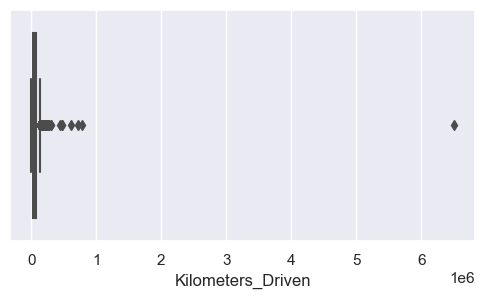

In [46]:
'''
One last step before proceeding into analysis, it's quite obvious that Kilometers_Driven Column has an extreme value 
which does not make any kind of sence. Again, 6.5 Million Km is really strange!
Let's view the Box Plot of this Column to help us in deciding how to deal with such extreme value:
'''

plt.figure(figsize=(6,3))
sns.boxplot(data=df , x = 'Kilometers_Driven');

In [47]:
'''
The discontinuity in extreme values supports our assumption, the most right point is abnormal and lies alone 
and away from other points!
Let's view the corresponding Data Row for more conformity:
'''

df[df.Kilometers_Driven == df.Kilometers_Driven.max()].style.set_properties(**{'color': 'green'})

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Brand
2328,Chennai,2017,6500000,Diesel,Automatic,First,15.970000,2993.000000,258.000000,5.000000,5507000.000000,6500000.000000,Bmw


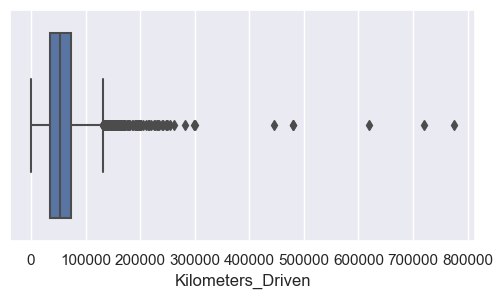

In [48]:
'''
Another proof that this observation is abnormal when knowing that the corresponding car has been manufactured in 2017!
Instead of dropping such observation, We will replace the Kilometers Driven with the Median of BMW Cars:
'''

df.loc[2328,'Kilometers_Driven'] = df[(df['Brand'] == 'Bmw')]['Kilometers_Driven'].median()
plt.figure(figsize=(6,3))
sns.boxplot(data=df , x = 'Kilometers_Driven');

<left> <font size=5 style='font-family:Courier New' color='Grey'> **3.3 Observations:**
<br> <left> <font size=3 style='font-family:Courier New' color='black'> The job is done, all Null Values have been imputed successfully.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **Now**; We can proceed further into making our insights and recommendation and finally, building our Linear Regression Model...

In [49]:
# Let's display the Dataset Statistics after such treatment (One last Time):

df.describe(include='all').T.style.set_properties(**{'color': 'green'})

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Location,6019,11,Mumbai,790,nan,nan,nan,nan,nan,nan,nan
Year,6019.000000,nan,nan,nan,2013.358199,3.269742,1998.000000,2011.000000,2014.000000,2016.000000,2019.000000
Kilometers_Driven,6019.000000,nan,nan,nan,57667.272138,37875.683713,171.000000,34000.000000,53000.000000,73000.000000,775000.000000
Fuel_Type,6019,5,Diesel,3205,nan,nan,nan,nan,nan,nan,nan
Transmission,6019,2,Manual,4299,nan,nan,nan,nan,nan,nan,nan
Owner_Type,6019,4,First,4929,nan,nan,nan,nan,nan,nan,nan
Mileage,6019.000000,nan,nan,nan,18.316215,4.179993,0.000000,15.290000,18.200000,21.100000,33.540000
Engine,6019.000000,nan,nan,nan,1620.269729,600.375933,72.000000,1197.000000,1493.000000,1984.000000,5998.000000
Power,6019.000000,nan,nan,nan,112.709002,53.720886,34.200000,74.000000,93.700000,138.100000,560.000000
Seats,6019.000000,nan,nan,nan,5.277953,0.803778,2.000000,5.000000,5.000000,5.000000,10.000000


<left> <font size=6 style='font-family:Courier New' color='Orange' > **4. Univariate Analysis:**

In [50]:
'''
Firstly, will start the Univariate Analysis by checking the distribution of Categorical Columns.
Since we have many categories in Brand Column, we will segregate the Brands into countries (i.e.: USA, Japan, India, ...)
This technique may help us on the perception of market sharing in terms of manufacturers countries:
'''

usa = ['Chevrolet' , 'Jeep' , 'Ford']
uk= ['Mini Cooper' , 'Land Rover' , 'Jaguar' , 'Bentley']
germany = ['Audi' , 'Volkswagen' , 'Bmw','Mercedes' , 'Porsche' , 'Smart']
japan = ['Honda' , 'Nissan' , 'Toyota' , 'Mitsubishi' , 'Datsun' , 'Isuzu']
india = ['Ambassador' , 'Tata' , 'Mahindra' , 'Force' , 'Maruti']
korea = ['Hyundai']
italy = ['Fiat' , 'Lamborghini']
france = ['Renault']
sweden = ['Volvo']
czech = ['Skoda']

df["Origin"] = np.nan

for i in range(len(df['Brand'])):
    if df.loc[i,'Brand'] in usa:
        df.loc[i,'Origin'] = 'USA'
    elif df.loc[i,'Brand'] in uk:
        df.loc[i,'Origin'] = 'UK'
    elif df.loc[i,'Brand'] in germany:
        df.loc[i,'Origin'] = 'Germany'
    elif df.loc[i,'Brand'] in japan:
        df.loc[i,'Origin'] = 'Japan'
    elif df.loc[i,'Brand'] in india:
        df.loc[i,'Origin'] = 'India'
    elif df.loc[i,'Brand'] in korea:
        df.loc[i,'Origin'] = 'Korea'
    elif df.loc[i,'Brand'] in italy:
        df.loc[i,'Origin'] = 'Italy'
    elif df.loc[i,'Brand'] in france:
        df.loc[i,'Origin'] = 'France'
    elif df.loc[i,'Brand'] in sweden:
        df.loc[i,'Origin'] = 'Sweden'
    elif df.loc[i,'Brand'] in czech:
        df.loc[i,'Origin'] = 'Czech'
    else :
        df.loc[i,'Origin'] = np.nan
        
df.head().style.set_properties(**{'color': 'green'})

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Brand,Origin
0,Mumbai,2010,72000,CNG,Manual,First,26.600000,998.000000,58.160000,5.000000,551000.000000,175000.000000,Maruti,India
1,Pune,2015,41000,Diesel,Manual,First,19.670000,1582.000000,126.200000,5.000000,1606000.000000,1250000.000000,Hyundai,Korea
2,Chennai,2011,46000,Petrol,Manual,First,18.200000,1199.000000,88.700000,5.000000,861000.000000,450000.000000,Honda,Japan
3,Chennai,2012,87000,Diesel,Manual,First,20.770000,1248.000000,88.760000,7.000000,1127000.000000,600000.000000,Maruti,India
4,Coimbatore,2013,40670,Diesel,Automatic,Second,15.200000,1968.000000,140.800000,5.000000,5314000.000000,1774000.000000,Audi,Germany


  1 - Count Plot: Origin  
India      1673
Germany    1155
Japan      1153
Korea      1107
USA         436
Czech       173
France      145
UK          127
Italy        29
Sweden       21
Name: Origin, dtype: int64


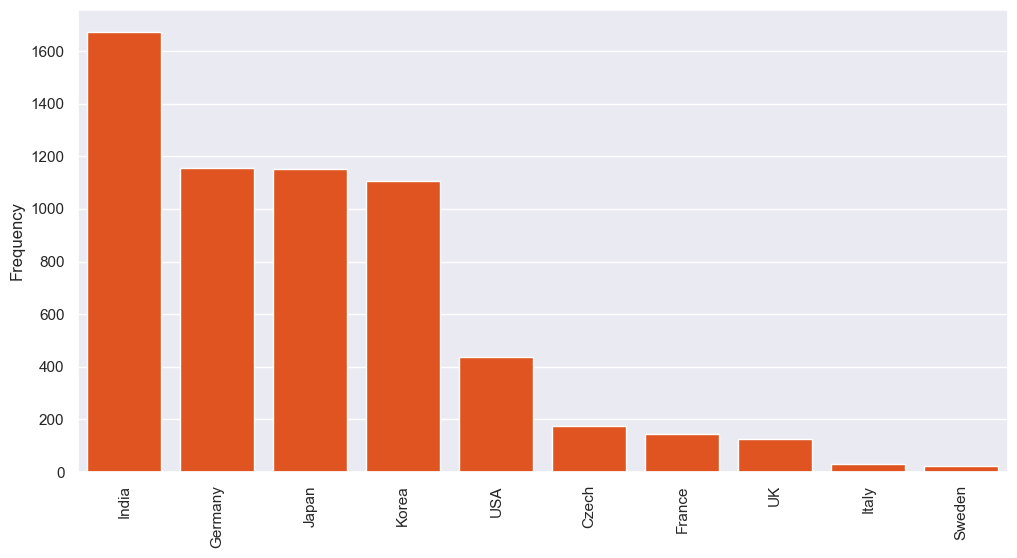

  2 - Count Plot: Brand  
Maruti         1211
Hyundai        1107
Honda           608
Toyota          411
Mercedes        318
Volkswagen      315
Ford            300
Mahindra        272
Bmw             267
Audi            236
Tata            186
Skoda           173
Renault         145
Chevrolet       121
Nissan           91
Land Rover       60
Jaguar           40
Fiat             28
Mitsubishi       27
Mini Cooper      26
Volvo            21
Porsche          18
Jeep             15
Datsun           13
Isuzu             3
Force             3
Smart             1
Ambassador        1
Bentley           1
Lamborghini       1
Name: Brand, dtype: int64


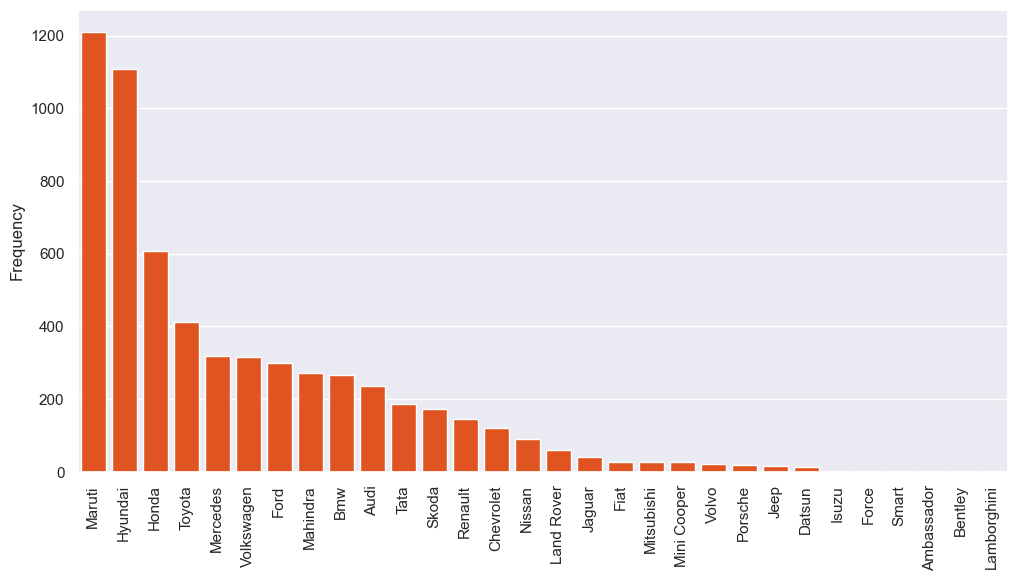

  3 - Count Plot: Location  
Mumbai        790
Hyderabad     742
Kochi         651
Coimbatore    636
Pune          622
Delhi         554
Kolkata       535
Chennai       494
Jaipur        413
Bangalore     358
Ahmedabad     224
Name: Location, dtype: int64


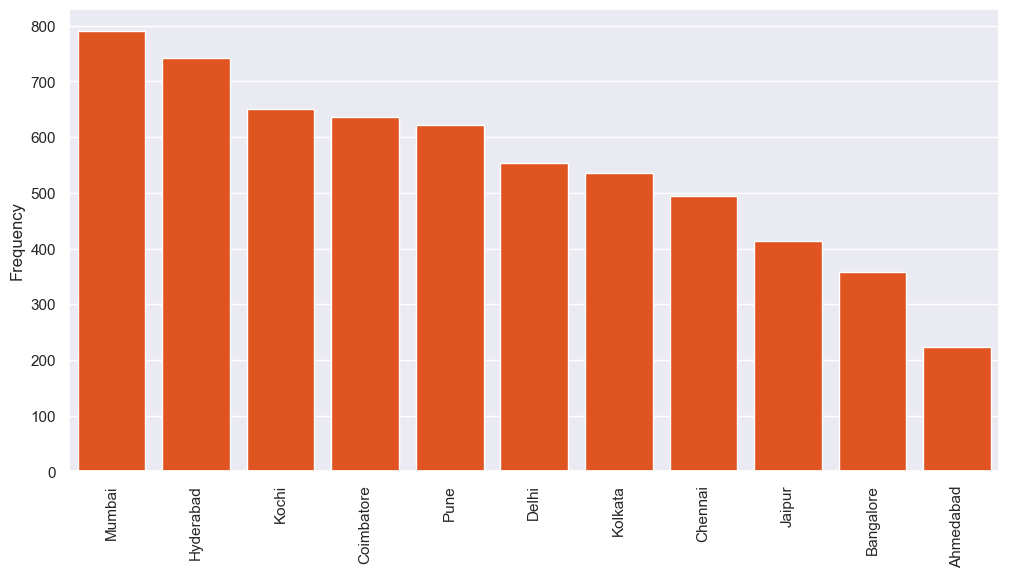

  4 - Count Plot: Fuel_Type  
Diesel      3205
Petrol      2746
CNG           56
LPG           10
Electric       2
Name: Fuel_Type, dtype: int64


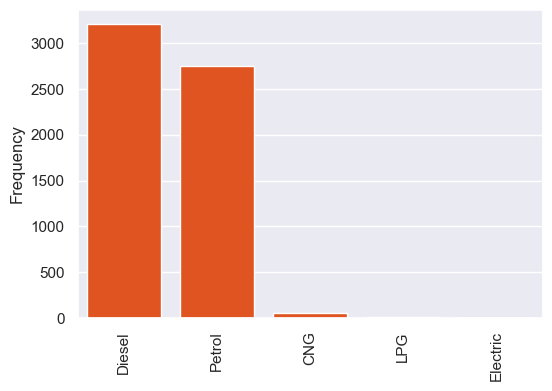

  5 - Count Plot: Transmission  
Manual       4299
Automatic    1720
Name: Transmission, dtype: int64


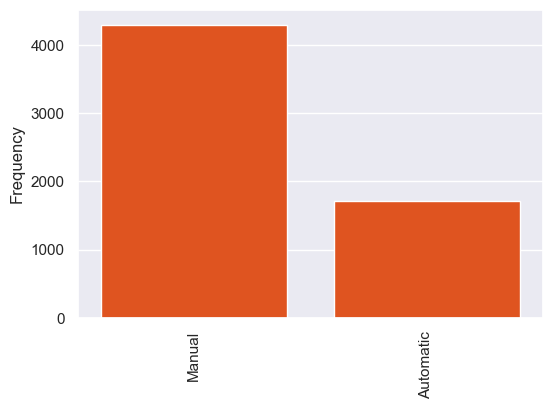

  6 - Count Plot: Owner_Type  
First             4929
Second             968
Third              113
Fourth & Above       9
Name: Owner_Type, dtype: int64


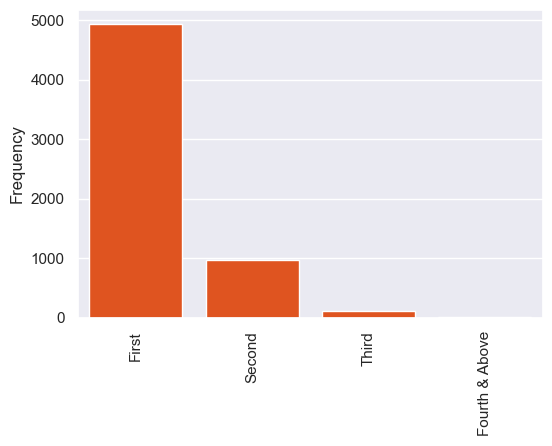

In [51]:
'''
Firstly, will start the Univariate Analysis by checking the distribution of Categorical Columns.
'''

objects_var = ['Origin' , 'Brand' , 'Location' , 'Fuel_Type' , 'Transmission' , 'Owner_Type']
numerics_var = ['Year' , 'Kilometers_Driven' , 'Mileage' , 'Engine' , 'Power' , 'Seats' , 'New_Price' , 'Price' ]

for index, element in enumerate(objects_var):
    if df[element].nunique() <= 6:
        plt.figure(figsize=(6 , 4))
    elif df[element].nunique() > 6:
        plt.figure(figsize=(12 , 6))

    print('\033[1m' , '\033[92m' , index+1 , '- Count Plot:' , element , '\033[0m' , '\033[92m')
    print(df[element].value_counts().sort_values(ascending=False))
    plot = sns.countplot(data=df , x = element , color = 'orangered', 
                         order=df[element].value_counts(ascending=False).index)
    plt.xticks(rotation = 90)
    plt.xlabel('')
    plt.ylabel('Frequency')
    plt.show();

<left> <font size=5 style='font-family:Courier New' color='Grey'> **4.1 Observations:**
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **1.** The market of used cars along with the count of cars might be an indicator of the popularity of such cars in the market.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **2.** Indian Made Cars dominating the market of used cars with 1,673 cars; Noting that, Maruti cars is the most popular with 1,211 units.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **3.** It's very important to notice that although Korean made cars are represented in a single brand only (Hyundai), it shows a high degree of popularity with 1,107 units.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **4.** USA, Czech, UK, Italy, and Sweden cars footer the list of popularity.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **5.** It's quite clear that Mumbai City represents the largest market of used cars. Even so, No. of units in following cities is decreasing in Consistent pace - No sharp decreasing has been noticed.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **6.** The vast majority of cars do use Diesel and Petrol as the Fuel; cars working on CNG, LPG, and Electric are few and don't reflect the interest of consumers in such type of cars.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **7.** Cars with Manual Transmission are most popular then Automatic.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **8.** The majority of cars are used by only one owner, which may indicate that the cars are in good condition.

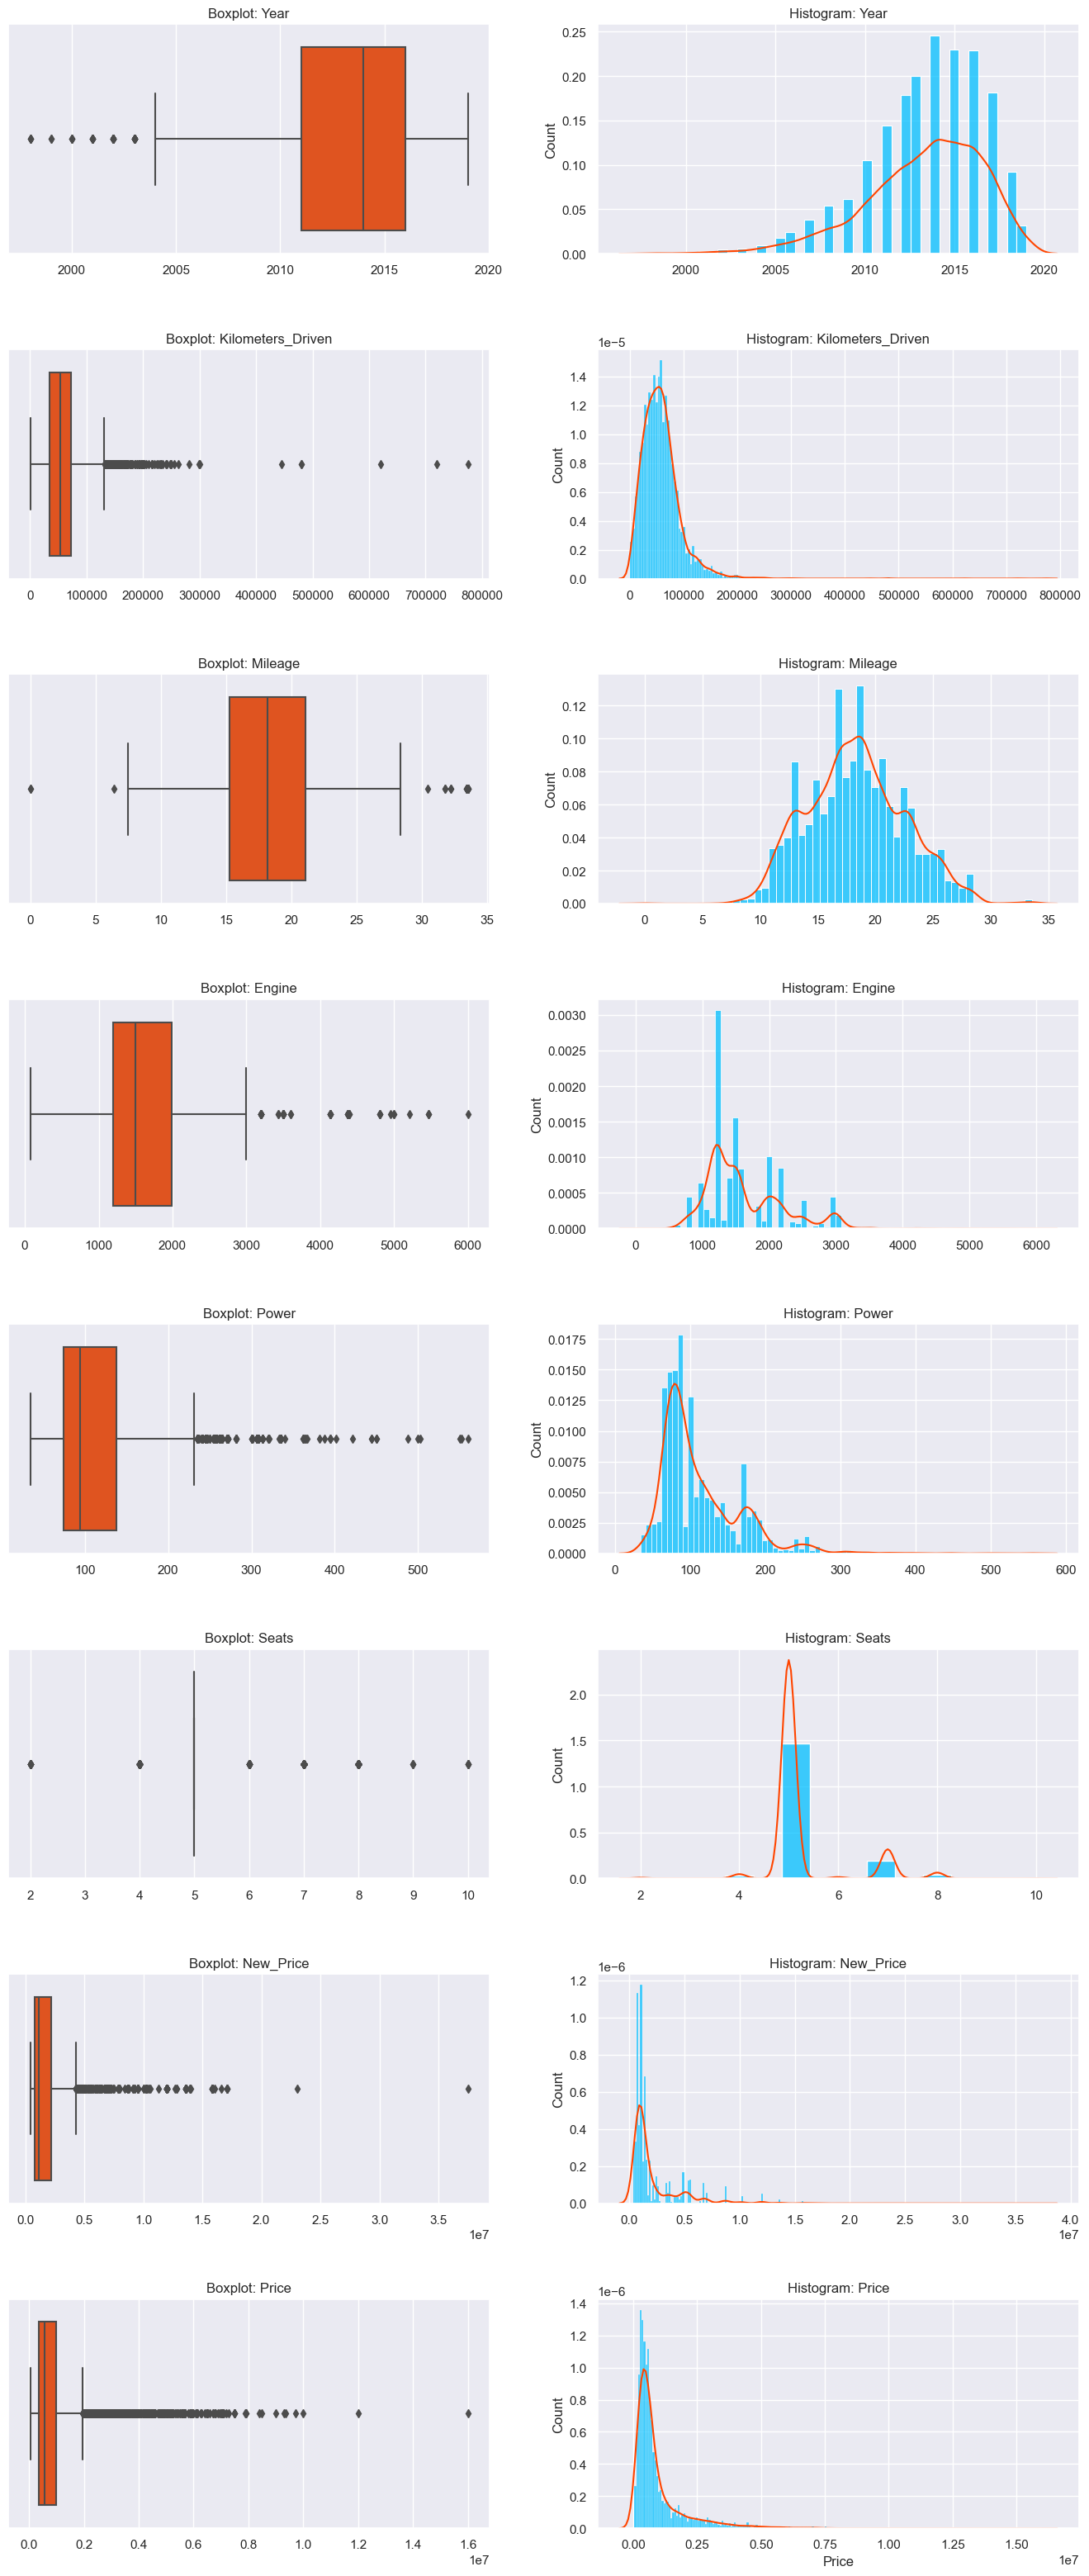

In [52]:
'''
Secondly, let's continue the Univariate Analysis by checking the distribution of Numerical Columns.
'''

fig, axis = plt.subplots(len(numerics_var), 2, figsize=(14, 32)) # 8 Rows X 2 Columns = 16 Plots
i = 0
for element in numerics_var:
    j = 0
    sns.boxplot(data=df , x=element , ax=axis[i, j] , color='orangered')
    plt.setp(axis[:, 0] , xlabel='')
    plt.setp(axis[:, 1] , xlabel='')
    plt.setp(axis[:, 1] , ylabel='Count')
    plt.setp(axis[i:i+1, 0] , title='Boxplot: '+ element)
    plt.setp(axis[i:i+1, 1] , title='Histogram: '+ element)
    sns.histplot(data=df , x=element , ax=axis[i, j+1] , color='deepskyblue' , stat='density')
    sns.kdeplot(data=df , x=element , ax=axis[i, j+1] , color='orangered')
    fig.tight_layout(pad=3.0)
    i+=1

<left> <font size=5 style='font-family:Courier New' color='Grey'> **4.2 Observations:**
<br> <left> <font size=4 style='font-family:Courier New' color='Grey'> **4.2.1 Year:**
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **1.** The left Skewness resulting from cars with old manufactoring year.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **2.** 75% of cars have a manufacturing year varying between 2011 to 2019, which indicate that the majority of cars are not very old.
<br> 
<br> <left> <font size=4 style='font-family:Courier New' color='Grey'> **4.2.2 Kilometers Driven:**
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **1.** Kilometers Driven is heavily skewed to right due to the presence of cars which have been driven for long distances.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **2.** 75% of cars have been driven for a distance between 171 and 73,000 Km, which indicate that most of the cars have a good engine condition. 
<br> 
<br> <left> <font size=4 style='font-family:Courier New' color='Grey'> **4.2.3 Mileage:** 
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **1.** Mileage Column has a distribution which somehow looks like a normal distribution. Furthermore, the presence of Zero Mileage is due to that our Dataset contains 2 Electric Cars.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **2.** 75% of cars have a Mileage with a maxumum 21.1 km/(Kg or Liter), which indicate that the cars are economical with a good fuel consumption. 
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **3.** small and large values are expected due to the nature of our dataset which contains all type of cars (Economic, Sedan, Sport, and Family cars).
<br> 
<br> <left> <font size=4 style='font-family:Courier New' color='Grey'> **4.2.4 Engine:** 
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **1.** Due to Dataset nature, no abnormality can be seen in Engine Column, readings seem to be realistic and such variation is possible. Furthermore, extreme values happen in a continuous manner and no extreme values liying alone and away from other observations.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **2.** 75% of cars have an Engine Displacement between 72 and 1984 CC; In addition, extreme values might be interpretted to Family, and/or Luxury Cars.
<br> 
<br> <left> <font size=4 style='font-family:Courier New' color='Grey'> **4.2.5 Power:**
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **1.** Although of Heaviy Righy Skewness, extreme values happen in a continuous manner and no extreme values liying alone and away from other observations.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **2.** 75% of cars have an Engine Power between 34.2 and 138.1 BHP; In addition, extreme values might be sport cars. 
<br> 
<br> <left> <font size=4 style='font-family:Courier New' color='Grey'> **4.2.6 Seats:**
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **1.** 50% of cars have 5 Seats which indicate the popularity of Sedan Cars.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **2.** Nothing is wrong in outliers as we're talking about different type of cars which include sport (2 Seats) and family (Up to 10 Seats) cars.
<br> 
<br> <left> <font size=4 style='font-family:Courier New' color='Grey'> **4.2.7 New Price:**
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **1.** The heavy Right Skewness is noticeable; When analysing the different types of cars including the luxury and sports cars, we might consider such skewness logical and realistic.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **2.** 75% of cars have a New Price between 3.91  and 21.77 Lakh INR, which indicates the popularity and market trend into limited budget cars.
<br> 
<br> <left> <font size=4 style='font-family:Courier New' color='Grey'> **4.2.8 Price:**
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **1.** The heavy Right Skewness is noticeable; When analysing the New Price, we must admit the positive relationship which always existing between the New and the Reselling Prices.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **2.** 75% of cars have a reselling Price between 0.44 and 9.95 Lakh INR.

<left> <font size=6 style='font-family:Courier New' color='Orange' > **5. Bivariate Analysis:**  

In [53]:
'''
Firstly, we will start the Bivariate Analysis by discovering the Correlation between all Numeric Columns in the Dataset.
Correlations are our guidance into understanding the Positive or Negative impact of each Variable on the other.  
'''

df.corr().style.set_properties(**{'color': 'green'})

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,New_Price,Price
Year,1.000000,-0.448495,0.292390,-0.049528,0.030682,0.014652,-0.007432,0.305327
Kilometers_Driven,-0.448495,1.000000,-0.139191,0.153972,-0.002987,0.211332,0.001269,-0.168056
Mileage,0.292390,-0.139191,1.000000,-0.639384,-0.545678,-0.343833,-0.445900,-0.334329
Engine,-0.049528,0.153972,-0.639384,1.000000,0.866232,0.396699,0.701411,0.658902
Power,0.030682,-0.002987,-0.545678,0.866232,1.000000,0.098666,0.803543,0.773732
Seats,0.014652,0.211332,-0.343833,0.396699,0.098666,1.000000,0.039739,0.053526
New_Price,-0.007432,0.001269,-0.445900,0.701411,0.803543,0.039739,1.000000,0.763362
Price,0.305327,-0.168056,-0.334329,0.658902,0.773732,0.053526,0.763362,1.000000


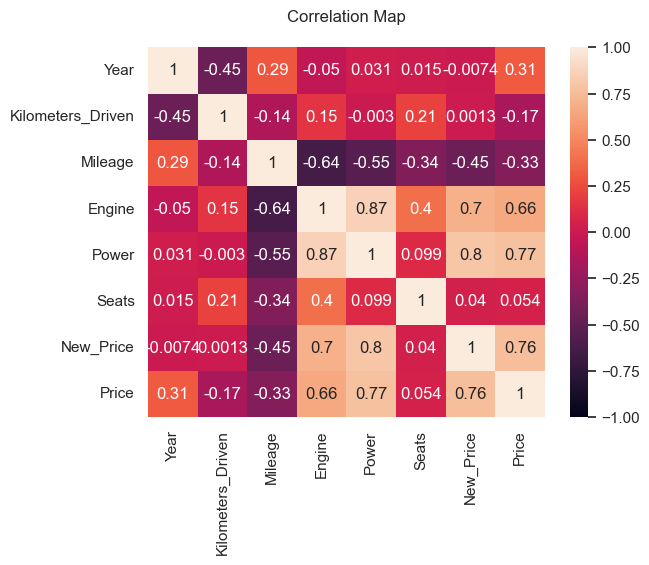

In [54]:
# Lets plot a Heatmap to visualize the correlation between Numerical Columns.

sns.heatmap(data=df.corr() , annot=True , vmin=-1 , vmax=1)
plt.title('Correlation Map\n');

<left> <font size=5 style='font-family:Courier New' color='Grey'> **5.1 Observations:**
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **1.** The strongest positive correlation between Engine-Power (0.87) is logical, cars with bigger Ingine have higher Power.  
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **2.** The strong positive correlations between Power-Price (0.77) and Engine-Price (0.66) is also logical, car price increases while it's engine/power increases. 
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **3.** It's logical and practical to have a correlation between Price-New Price (0.76), purchasing price reflects automatically in reselling price. 
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **4.** A week positive correlation is found between Year-Price (0.31), cars with new manufacturing year tend to have hif=gher price than old manufacturing cars.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **5.** The negative correlation between Power-Mileage (-0.55) and Engine-Mileage (-0.64) is logical, it's well known that high performance cars have higher fuel consumption which in tern result in lower Kimlometers/Kg or Liter. 
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **6.** Although the weak positive correlation between Year-Price (0.31), it reflects the fact of newer cars have higher prices. 
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **7.** Also, The medium negative correlation between Year-Kilometers Driven (-0.45) reflects the fact of newer cars have beed driven for shorter distances than old cars.

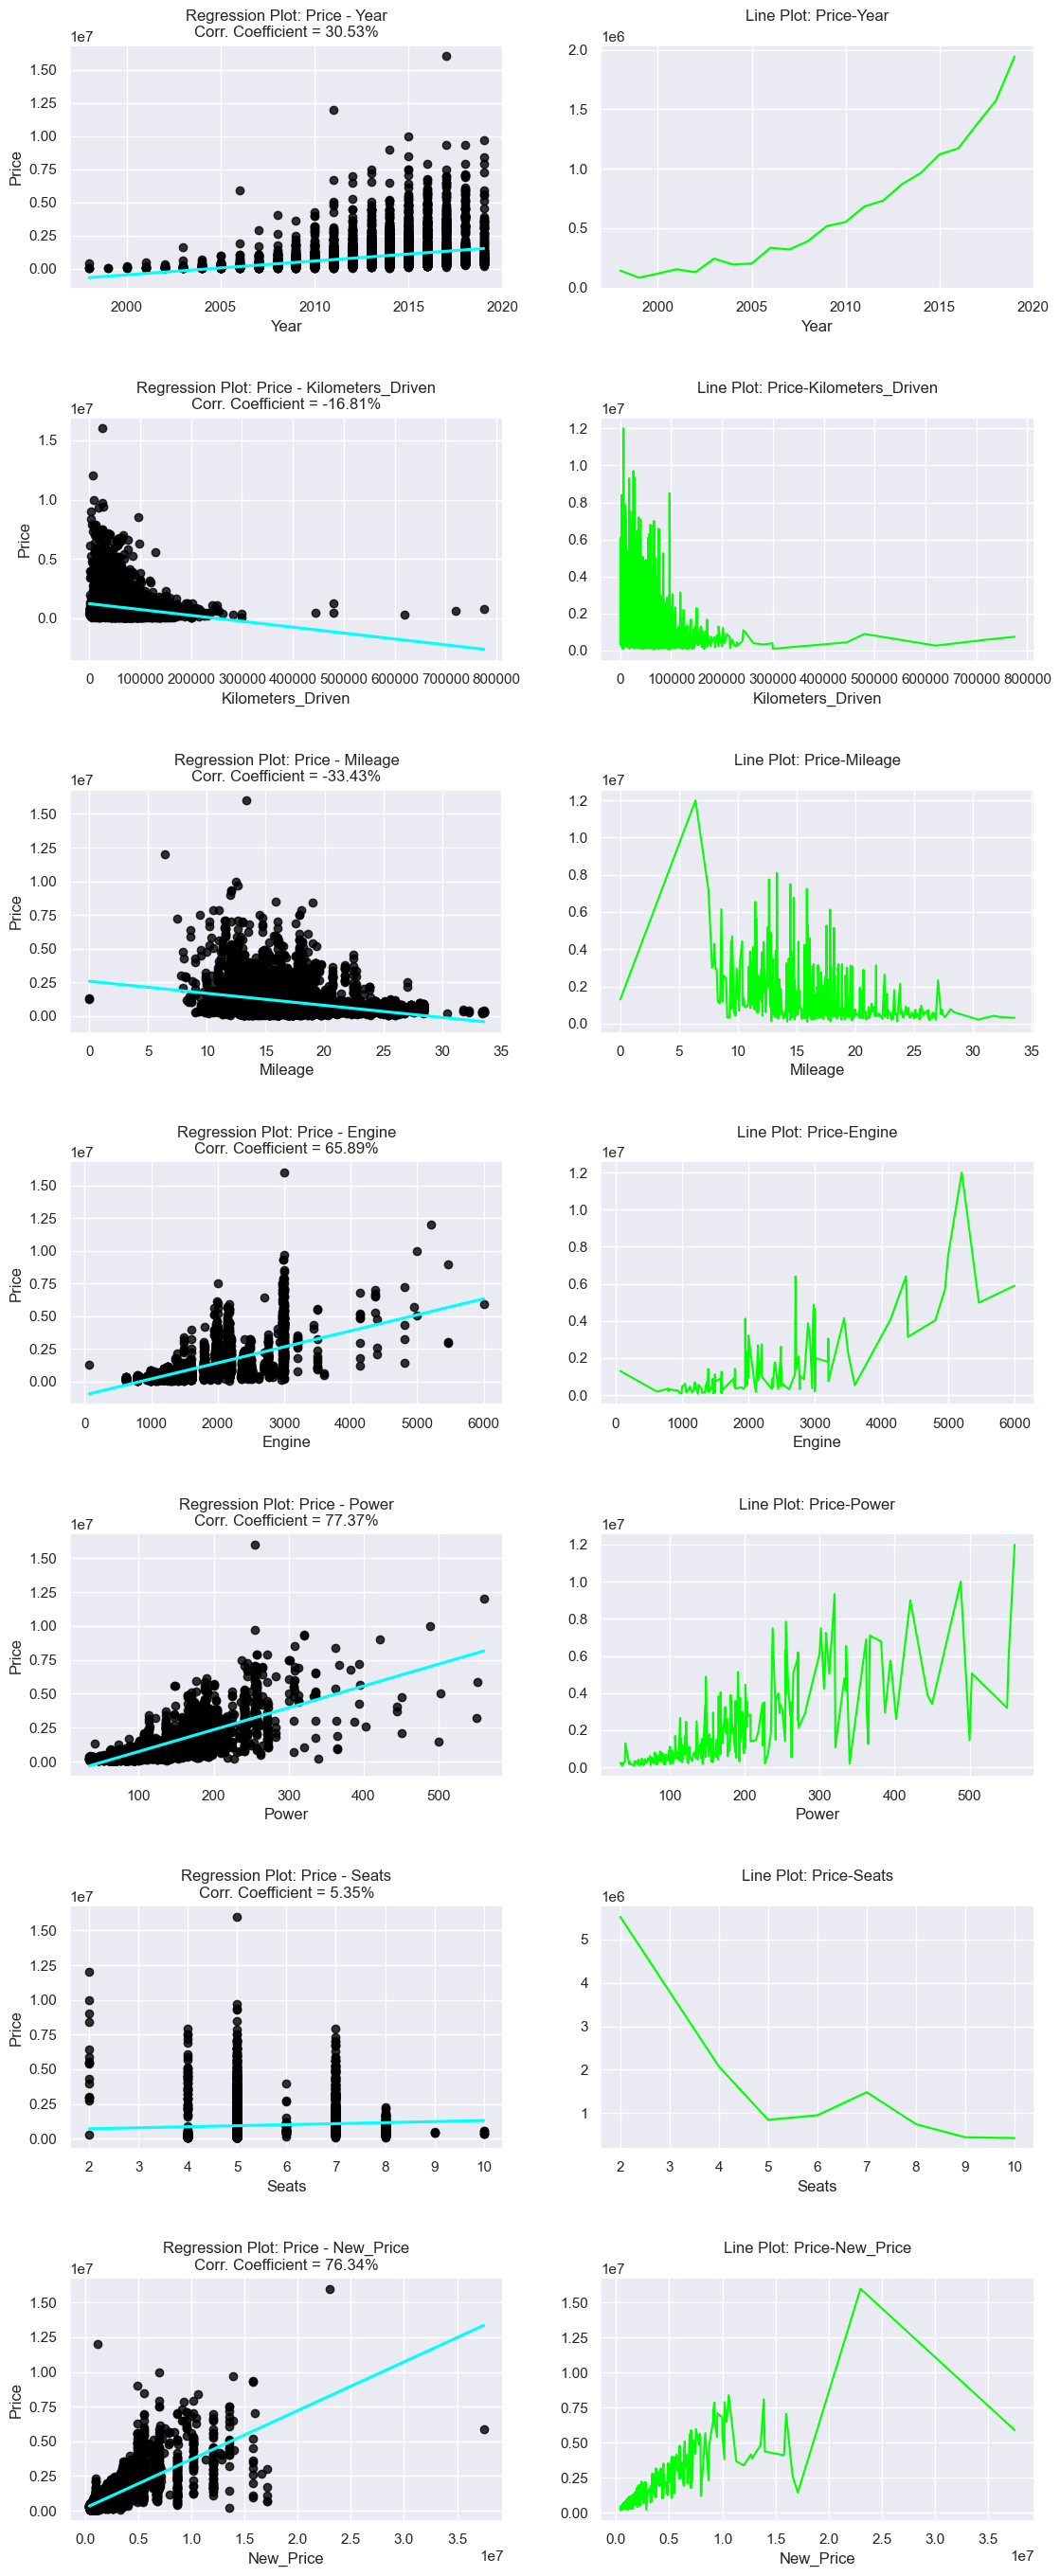

In [55]:
'''
Although the Heat Map shows significant information about the relationships between Numerical Variables, we will
use the Regression/Line Plots to visualize such relationships:
Note: Since we're building a Linear Regression Model using the Price as our Target Variable, we will take this Target as
our reference while anlayzing how other variables affect it:
'''

fig, axis = plt.subplots(len(numerics_var)-1, 2, figsize=(12, 28)) #7 Rows X 2 Columns = 14 Plots
i = 0
for element in numerics_var:
    if element != 'Price':  # Excluding the Price Variable from Iteration
        sns.regplot(data=df, x=element, y='Price', ax=axis[i,0], color='Black', ci=False, line_kws={"color": "Cyan"})
        sns.lineplot(data=df, x=element, y='Price', ax=axis[i,1], color='Lime', ci=False)
        plt.setp(axis[i:i+1, 0], title='Regression Plot: Price - '+ element+'\n'+\
            'Corr. Coefficient = '+ str("{:.02%}".format(df[element].corr(df['Price']))))
        plt.setp(axis[i:i+1, 1], title='Line Plot: Price-'+ element+'\n')
        plt.setp(axis[:, 1], ylabel='')
        fig.tight_layout(pad=3.0)
        fig.text(0, 0, '') 
    i+=1

<left> <font size=5 style='font-family:Courier New' color='Grey'> **5.2 Observations:**
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **1.** The increase in price with the increasing in year of manufacture is obvious; As a car gets older, its price will correspondingly drop. 
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **2.** Almost, the cars with heavy usage in terms of driven Kilometres have lower prices. 
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **3.** Also, High Mileage cars seem to have lower reselling price; it might indicate the trend of customers toward economical cars. Also, cars with Mileage between 3 and 8 representing the higher prices.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **4.** It's logical to say as the Engine Displacement/Horses Power increase, the price will increase accordingly. Such cars with high performance are usually considered as Luxury/Sport Cars.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **5.** The Decreasing in Price while the No. of Seats increases can be interpreted to the High Price of 2 Seats Cars which are almost a Sport Cars.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **6.** Finally, it's normal to have a positive relationship between Purchasing Price and Reselling Price, the Decreasing in any item's price is hugely affected by its original price.

  - Box Plot: Brand vs Price  
                    Price
Brand                    
Lamborghini  1.200000e+07
Bentley      5.900000e+06
Porsche      4.834833e+06
Land Rover   3.925950e+06
Jaguar       3.763225e+06
Mini Cooper  2.689692e+06
Mercedes     2.680987e+06
Audi         2.553771e+06
Bmw          2.524315e+06
Volvo        1.880286e+06
Jeep         1.871867e+06
Isuzu        1.469667e+06
Toyota       1.158002e+06
Mitsubishi   1.105889e+06
Force        9.333333e+05
Mahindra     8.045919e+05
Skoda        7.559075e+05
Ford         6.889400e+05
Renault      5.799034e+05
Honda        5.411743e+05
Hyundai      5.343433e+05
Volkswagen   5.307270e+05
Nissan       4.738352e+05
Maruti       4.517267e+05
Tata         3.562849e+05
Fiat         3.269286e+05
Datsun       3.049231e+05
Chevrolet    3.044463e+05
Smart        3.000000e+05
Ambassador   1.350000e+05


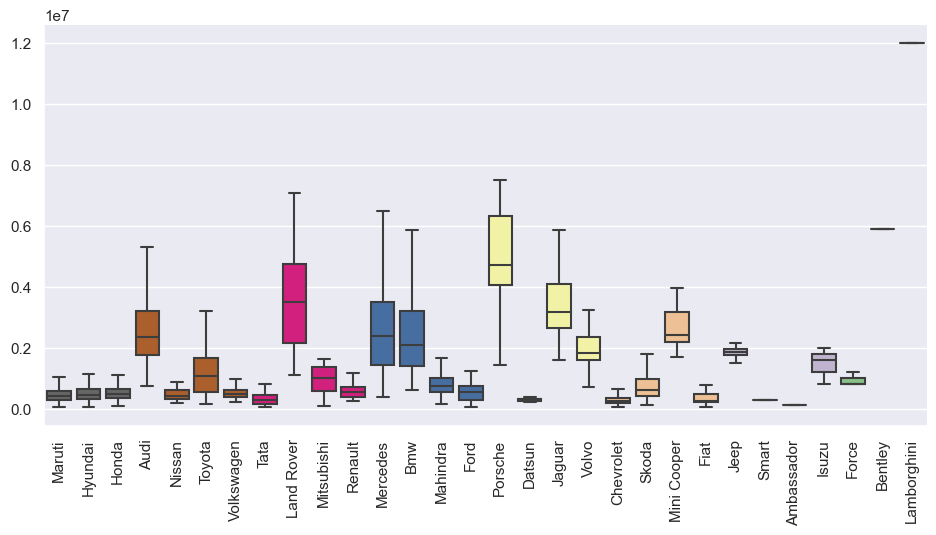

In [56]:
'''
Still we have to continue our Bivariate Analysis with trying to discover more relationships between Numerical 
and Categorical Columns.
Starting with the Brand:
'''

x_axis = 'Brand'
x_values = df[x_axis].unique().tolist()
y_axis = 'Price'

print('\033[1m', '\033[92m' , '- Box Plot:' , x_axis , 'vs' , y_axis , '\033[0m', '\033[92m') 

print(df.groupby([x_axis])[[y_axis]].mean().sort_values(by = y_axis , ascending=False))

sns.catplot(data=df , x=x_axis , y=y_axis , kind='box' , ci=False, height=5 , aspect=2 , showfliers=False , palette='Accent_r')
plt.xlabel('')
plt.ylabel('')
plt.xticks(rotation=90)
plt.show();

<left> <font size=5 style='font-family:Courier New' color='Grey'> **5.3 Observations:**
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **1.** The Box Plot shows that Lamborghini, Bentley , Porsche, Land Rover, and Jaguar cars are the most expensive cars. 
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **2.** Porsche, Land Rover, Mercedes, and BMW cars have the most variability which might indicare the diversity of Brands being observed for each of them. 
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **3.** The Box Plot explains an old conclusion when we found that Maruti, Hyundai, and Honda are the most popular cars, we can say now this popularity may occur due to less prices. Although it does not have the lower average price, its huge availability with other Brands make this observation valuable.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **4.** Although Smart, Ambassador, and Datsun cars have low prices, they have very small percentage of available cars comparing with other cars in the same price range.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **5.** The popularity of Smart, Ambassador, Bentley, and Lamborghini cars is almost negligible.    

  - Box Plot: Brand vs Year  
                    Year
Brand                   
Jeep         2017.600000
Isuzu        2017.333333
Datsun       2016.538462
Mini Cooper  2015.076923
Renault      2014.855172
Jaguar       2014.400000
Land Rover   2014.016667
Force        2014.000000
Mahindra     2013.731618
Audi         2013.614407
Mercedes     2013.550314
Volkswagen   2013.511111
Hyundai      2013.495032
Maruti       2013.445087
Tata         2013.435484
Volvo        2013.285714
Porsche      2013.222222
Ford         2013.206667
Nissan       2013.186813
Bmw          2013.056180
Honda        2013.039474
Toyota       2013.007299
Skoda        2012.346821
Fiat         2011.821429
Chevrolet    2011.570248
Mitsubishi   2011.111111
Lamborghini  2011.000000
Smart        2008.000000
Bentley      2006.000000
Ambassador   2003.000000


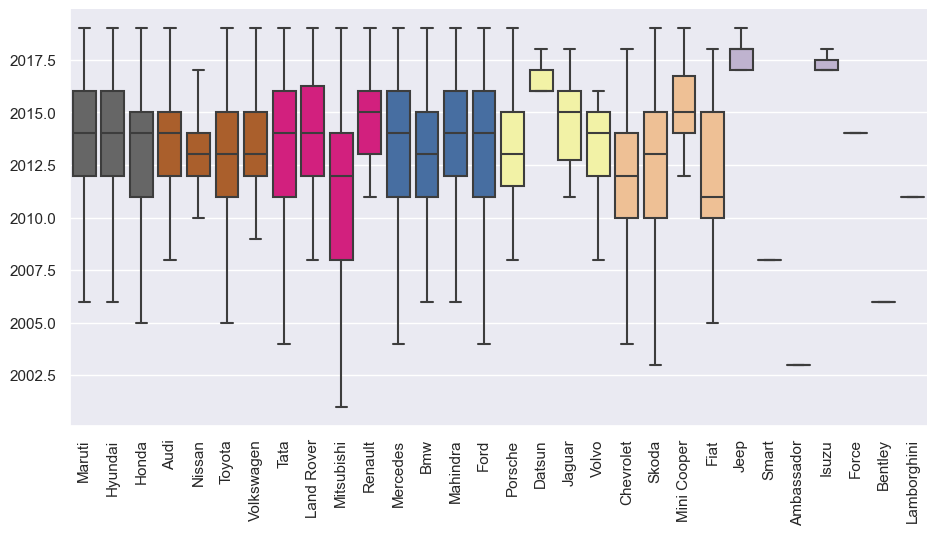

In [57]:
'''
In addition to Brand-Price Analysis, we may also analyzi the Brand-Year to discover some important points about how old
some cars are existing in the market of used cars:
'''

x_axis = 'Brand'
x_values = df[x_axis].unique().tolist()
y_axis = 'Year'

print('\033[1m', '\033[92m' , '- Box Plot:' , x_axis , 'vs' , y_axis , '\033[0m', '\033[92m') 

print(df.groupby([x_axis])[[y_axis]].mean().sort_values(by = y_axis , ascending=False))

sns.catplot(data=df , x=x_axis , y=y_axis , kind='box' , ci=False, height=5 , aspect=2 , showfliers=False , palette='Accent_r')
plt.xlabel('')
plt.ylabel('')
plt.xticks(rotation=90)
plt.show();

<left> <font size=5 style='font-family:Courier New' color='Grey'> **5.4 Observations:**
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **1.** Mitsubishi is the oldest car existing in the market and it's still being sold/offered for sale. 
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **2.** With the exception of cars that are on the market in a very small quantity, some cars have been entered the market recently like Jeep, Isuzu, and Jaguar. 

  - Box Plot: Location vs Price  
                   Price
Location                
Coimbatore  1.507822e+06
Bangalore   1.332863e+06
Kochi       1.117919e+06
Hyderabad   9.776550e+05
Delhi       9.707726e+05
Mumbai      9.429329e+05
Ahmedabad   8.457321e+05
Chennai     7.753623e+05
Pune        6.726254e+05
Jaipur      5.809225e+05
Kolkata     5.661215e+05


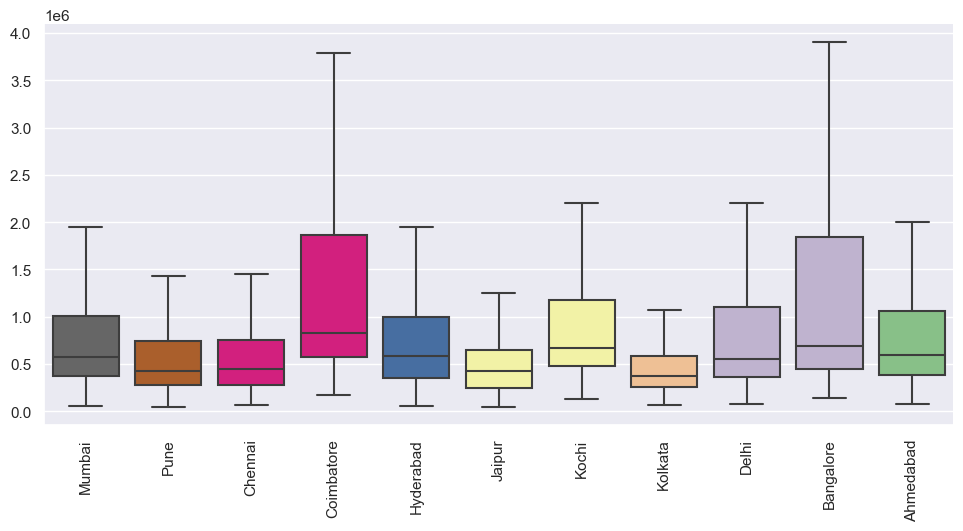

In [58]:
# Now, Let's investigate the Location and visualize how much it's being affected by the Price:

x_axis = 'Location'
x_values = df[x_axis].unique().tolist()
y_axis = 'Price'

print('\033[1m', '\033[92m' , '- Box Plot:' , x_axis , 'vs' , y_axis , '\033[0m', '\033[92m') 

print(df.groupby([x_axis])[[y_axis]].mean().sort_values(by = y_axis , ascending=False))

sns.catplot(data=df , x=x_axis , y=y_axis , kind='box' , ci=False, height=5 , aspect=2 , showfliers=False , palette='Accent_r')
plt.xlabel('')
plt.ylabel('')
plt.xticks(rotation=90)
plt.show();

<left> <font size=5 style='font-family:Courier New' color='Grey'> **5.5 Observations:**
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **1.** Although Mumbai City has the maximum No. of  cars (790), it shows that most of its cars have an average price less than other cities which might indicate the average income of Mumbai Residents have limited incomeand so they prefer the cars with lower prices.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **2.** It's quite noticed that the most expensive cars belong to Coimbatore and Bangalore cities; Again, it might indicate the richness of these cities residents.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **3.** Both Kolkata and Jaipur have the cheapest cars; Almost, the majority of its residents never think about luxury/sport cars. 

  - Box Plot: Fuel_Type vs Price  
                  Price
Fuel_Type              
Electric   1.287500e+06
Diesel     1.284061e+06
Petrol     5.701100e+05
CNG        3.516786e+05
LPG        2.487000e+05


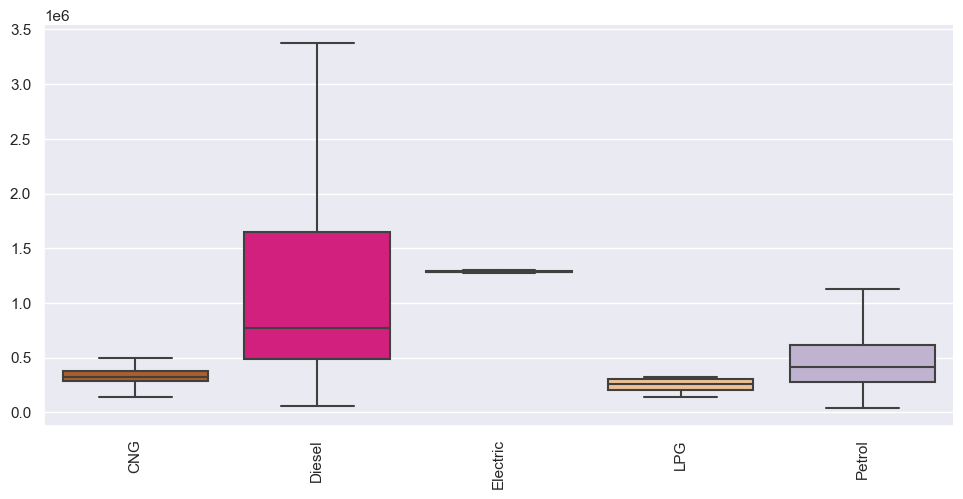

In [59]:
# Further to our Analysis, we may study the prices in term of Fuel Type:

x_axis = 'Fuel_Type'
x_values = df[x_axis].unique().tolist()
y_axis = 'Price'

print('\033[1m', '\033[92m' , '- Box Plot:' , x_axis , 'vs' , y_axis , '\033[0m', '\033[92m') 

print(df.groupby([x_axis])[[y_axis]].mean().sort_values(by = y_axis , ascending=False))

sns.catplot(data=df , x=x_axis , y=y_axis , kind='box' , ci=False, height=5 , aspect=2 , showfliers=False , palette='Accent_r')
plt.xlabel('')
plt.ylabel('')
plt.xticks(rotation=90)
plt.show();

<left> <font size=5 style='font-family:Courier New' color='Grey'> **5.6 Observations:**
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **1.** Although the Average Price for Electric Cars is the higher, we may notice that Diesel Cars have the higher prices followed by Petrol Cars.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **2.** In addition to Price, it's visible that the variety of options in Diesel Cars is the highest among other cars.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **3.** Although LPG Cars are cheap compared with other cars, it's not famous when knowing that just a few cars are available in the market of used cars.

  - Box Plot: Transmission vs Price  
                     Price
Transmission              
Automatic     1.984397e+06
Manual        5.332703e+05


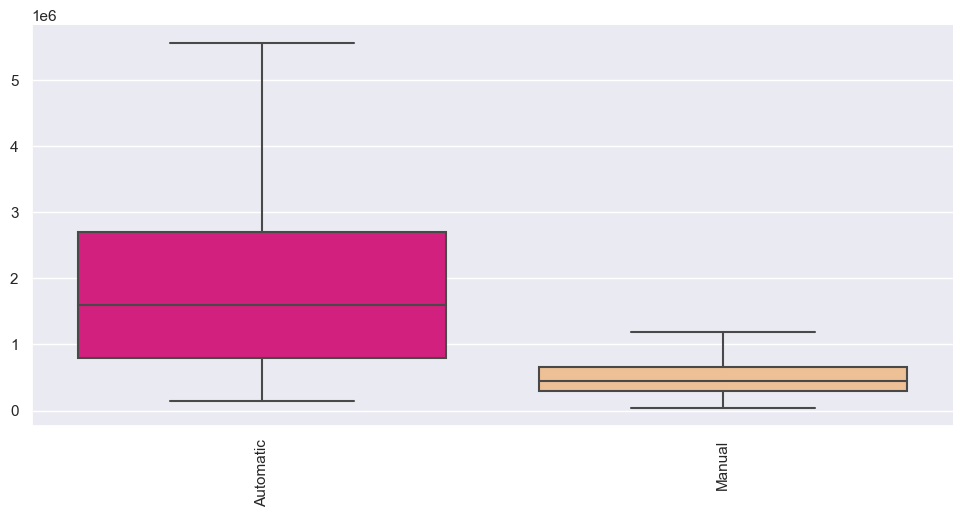

In [60]:
# Further to our Analysis, we may study the prices in term of Fuel Type:

x_axis = 'Transmission'
x_values = df[x_axis].unique().tolist()
y_axis = 'Price'

print('\033[1m', '\033[92m' , '- Box Plot:' , x_axis , 'vs' , y_axis , '\033[0m', '\033[92m') 

print(df.groupby([x_axis])[[y_axis]].mean().sort_values(by = y_axis , ascending=False))

sns.catplot(data=df , x=x_axis , y=y_axis , kind='box' , ci=False, height=5 , aspect=2 , showfliers=False , palette='Accent_r')
plt.xlabel('')
plt.ylabel('')
plt.xticks(rotation=90)
plt.show();

<left> <font size=5 style='font-family:Courier New' color='Grey'> **5.7 Observations:**
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **1.** Cars with Automatic Transmission are much more expensive than Manual, Also the variability is more.

  - Box Plot: Owner_Type vs Price  
                        Price
Owner_Type                   
First           996244.471495
Second          759988.636364
Third           500725.663717
Fourth & Above  328000.000000


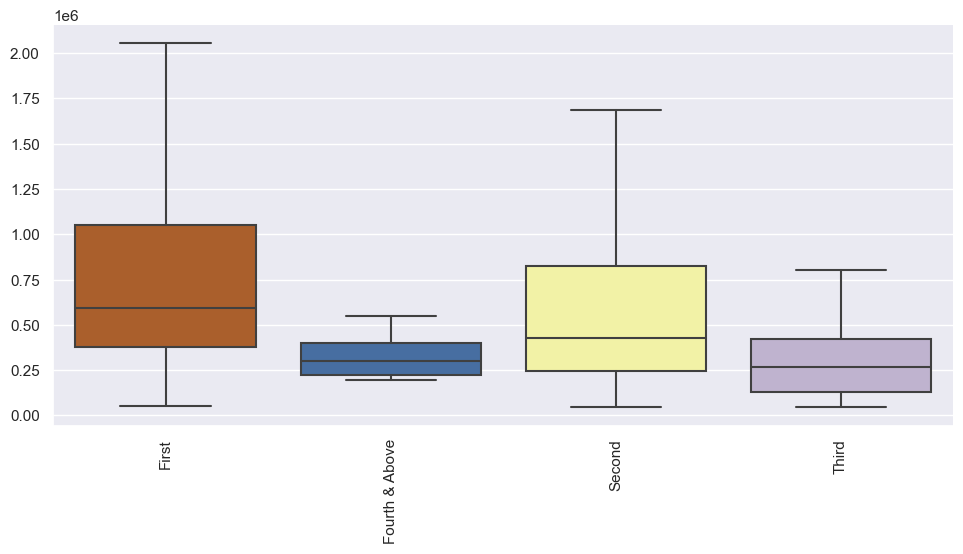

In [61]:
# Finally, Let's investigate if there is any relationship between Owner_Type and the Price:

x_axis = 'Owner_Type'
x_values = df[x_axis].unique().tolist()
y_axis = 'Price'

print('\033[1m', '\033[92m' , '- Box Plot:' , x_axis , 'vs' , y_axis , '\033[0m', '\033[92m') 

print(df.groupby([x_axis])[[y_axis]].mean().sort_values(by = y_axis , ascending=False))

sns.catplot(data=df , x=x_axis , y=y_axis , kind='box' , ci=False, height=5 , aspect=2 , showfliers=False , palette='Accent_r')
plt.xlabel('')
plt.ylabel('')
plt.xticks(rotation=90)
plt.show();

<left> <font size=5 style='font-family:Courier New' color='Grey'> **5.8 Observations:**
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **1.** We've to sat that above results are 100% Logic, it's fair to say that any item price will decrease every time it's being sold.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **2.** In addition to fact that First Ownership Cars is the most expensive, the variability of options in the local market is the most for the cars which have been used by single owner. 

  - Box Plot: Location vs Year  
                   Year
Location               
Kochi       2015.503840
Coimbatore  2015.399371
Delhi       2013.330325
Mumbai      2013.297468
Ahmedabad   2013.276786
Kolkata     2013.057944
Bangalore   2012.801676
Hyderabad   2012.679245
Jaipur      2012.481840
Pune        2012.273312
Chennai     2011.914980


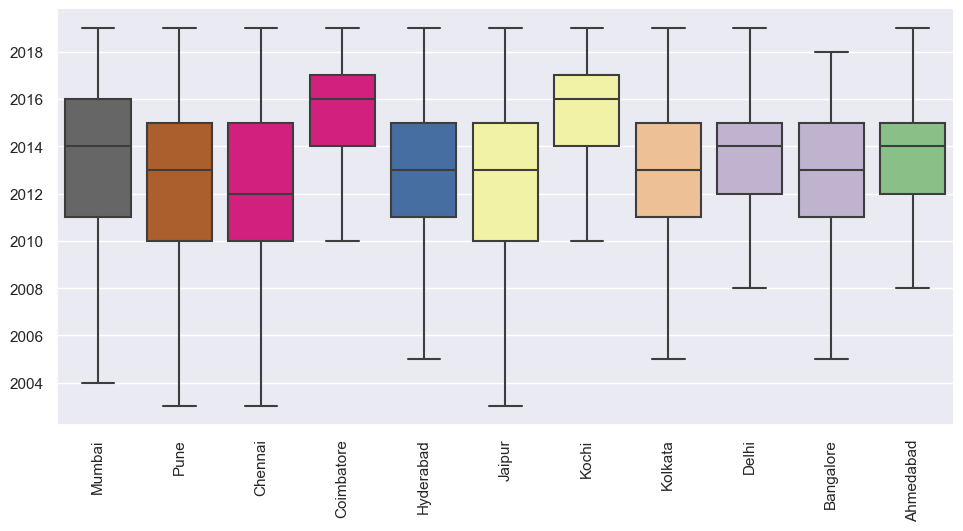

In [62]:
# It will be helful also to study the Location in term of Manufacturing Year to have a better recommendation:

x_axis = 'Location'
x_values = df[x_axis].unique().tolist()
y_axis = 'Year'

print('\033[1m', '\033[92m' , '- Box Plot:' , x_axis , 'vs' , y_axis , '\033[0m', '\033[92m') 

print(df.groupby([x_axis])[[y_axis]].mean().sort_values(by = y_axis , ascending=False))

sns.catplot(data=df , x=x_axis , y=y_axis , kind='box' , ci=False, height=5 , aspect=2 , showfliers=False , palette='Accent_r')
plt.xlabel('')
plt.ylabel('')
plt.xticks(rotation=90)
plt.show();

<left> <font size=5 style='font-family:Courier New' color='Grey'> **5.9 Observations:**
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **1.** It'v very important to notice that both of Kochi and Coimbatore cities have the newest cars, it might indicate that the residents used their cars for long periods and don't change it frequently.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **2.** On the other hand; Pune, Chennai, and Jaipur cities have the oldest cars.

  - Box Plot: Location vs Engine  
                 Engine
Location               
Bangalore   1809.192737
Coimbatore  1718.627358
Delhi       1708.518953
Mumbai      1670.401266
Hyderabad   1631.865229
Chennai     1621.121457
Ahmedabad   1584.767857
Kochi       1581.485407
Pune        1543.461415
Kolkata     1475.930841
Jaipur      1451.961259


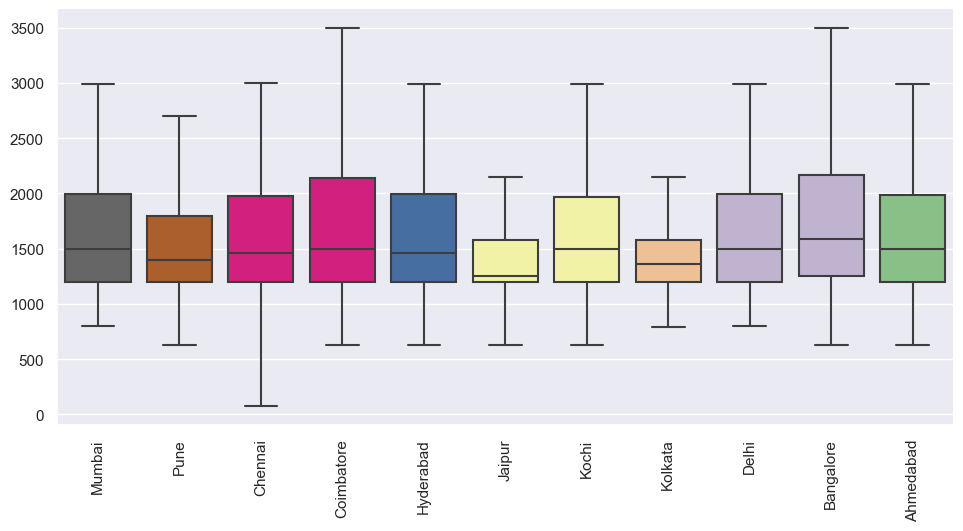

In [63]:
# One last step; as Engine is proportional with Power, we may take it as our reference to discover the trend of residents:

x_axis = 'Location'
x_values = df[x_axis].unique().tolist()
y_axis = 'Engine'

print('\033[1m', '\033[92m' , '- Box Plot:' , x_axis , 'vs' , y_axis , '\033[0m', '\033[92m') 

print(df.groupby([x_axis])[[y_axis]].mean().sort_values(by = y_axis , ascending=False))

sns.catplot(data=df , x=x_axis , y=y_axis , kind='box' , ci=False, height=5 , aspect=2 , showfliers=False , palette='Accent_r')
plt.xlabel('')
plt.ylabel('')
plt.xticks(rotation=90)
plt.show();

<left> <font size=5 style='font-family:Courier New' color='Grey'> **5.10 Observations:**
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **1.** The cars with highest Engine Displacement are found in Bangalore and Coimbatore Cities.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **2.** The cars with lowest Engine Displacement are found in Jaipur and Kolkata Cities.

  - Violin Plot: Location vs Seats  
               Seats
Location            
Delhi       5.368231
Bangalore   5.326816
Hyderabad   5.320755
Chennai     5.313765
Coimbatore  5.301887
Ahmedabad   5.272321
Mumbai      5.270886
Pune        5.268489
Jaipur      5.242131
Kochi       5.210445
Kolkata     5.164486


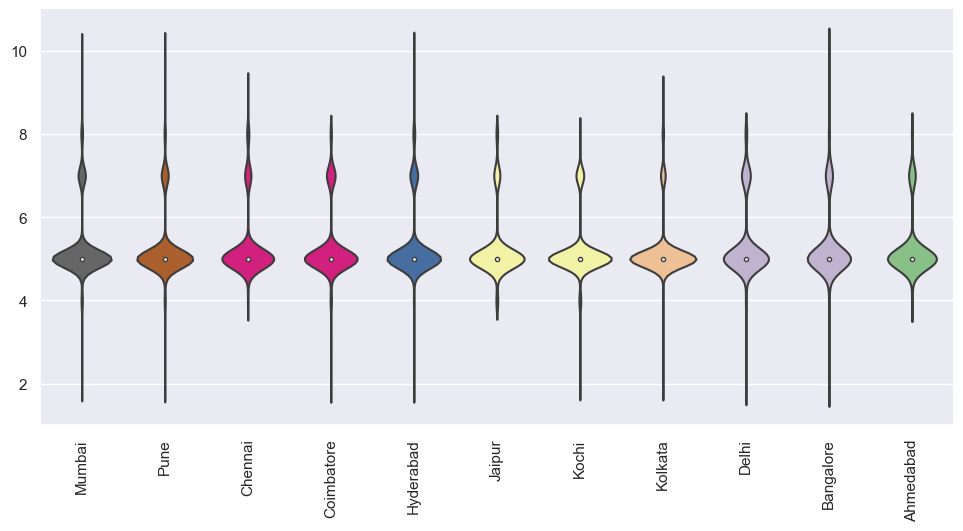

In [64]:
# Additionally, we may visulaize the Cars in terms of Seats per location:

x_axis = 'Location'
x_values = df[x_axis].unique().tolist()
y_axis = 'Seats'

print('\033[1m', '\033[92m' , '- Violin Plot:' , x_axis , 'vs' , y_axis , '\033[0m', '\033[92m') 

print(df.groupby([x_axis])[[y_axis]].mean().sort_values(by = y_axis , ascending=False))

sns.catplot(data=df , x=x_axis , y=y_axis , kind='violin' , ci=False, height=5 , aspect=2 , showfliers=False , palette='Accent_r')
plt.xlabel('')
plt.ylabel('')
plt.xticks(rotation=90)
plt.show();

<left> <font size=5 style='font-family:Courier New' color='Grey'> **5.11 Observations:**
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **1.** Except some cars with smaller range of No. of seats are being sold in Jaipur and Agmedabad cities, most of the remaining cities contain all options in term of No. of Seats.

<left> <font size=6 style='font-family:Courier New' color='Orange' > **6. Business Insights:**
<br> <left> <font size=3 style='font-family:Courier New' color='black'> During the analysis, the focal point was the Car Price (Reselling Price).
<br> <left> <font size=3 style='font-family:Courier New' color='black'> In order to be able to give our business recommendations and expectations about future sales and which type of Location must be targetted, we were in a real need to determine the most important factors that have a positive influence.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> We didn't rely - only - on how many cars is being sold/offered for sale; The residents in some cities may preferred expensive cars, newer cars, or even specific type of fuel.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> Consequently, we've adopted The Price as the most important factor that influence the decision of buying a car.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> Finally, We don't think that Multivariate Analysis will be usefull due to the huge No. of categories under studying; Also, the insights derived from Univariate/Multivariate Analysis would be more than enough to proceed with our Insights/Recommendations!
    
<br> <left> <font size=4 style='font-family:Courier New' color='Grey'> **6.1 Brand:**
<br> <left> <font size=4 style='font-family:Courier New' color='Black'> **1.** Maruti and Hyundai Cars are the most popular cars due to its huge availability in the market of used cars.
<br> <left> <font size=4 style='font-family:Courier New' color='Black'> **2.** In term of the Car's Origin, We have found that Indian Cars are the most popular, followed by German/Japan/Korean with a convergent market sharing.   
    
<br> <left> <font size=4 style='font-family:Courier New' color='Grey'> **6.2 Location:**
<br> <left> <font size=4 style='font-family:Courier New' color='Black'> **1.** The largest No. of cars being sold/offered for sale is in Mumbai City.
<br> <left> <font size=4 style='font-family:Courier New' color='Black'> **2.** In term of the Price, It's quite noticed that the most expensive cars belong to Coimbatore and Bangalore cities which might indicate the richness of their residents.
        
<br> <left> <font size=4 style='font-family:Courier New' color='Grey'> **6.3 Year:**
<br> <left> <font size=4 style='font-family:Courier New' color='Black'> **1.** The vast majority of cars have a manufacturing year between 2004 and 2019, while 50% of them lies in the years 2011 to 2016.
<br> <left> <font size=4 style='font-family:Courier New' color='Black'> **2.** Mitsubishi Cars are well known in the Market as they are existing with Years varying from very old to very new.
<br> <left> <font size=4 style='font-family:Courier New' color='Black'> **3.** Jeep, Isuzu, and Jaguar Cars have been entered into the Market recently as they are existing with new Manufacturing Years.

<br> <left> <font size=4 style='font-family:Courier New' color='Grey'> **6.4 Kilometers_Driven:**
<br> <left> <font size=4 style='font-family:Courier New' color='Black'> **1.** 75% of the cars have been driven between 171 and 73,000 km; These readings are considered to be low and can be explained by the fact that the engine is in good condition.

<br> <left> <font size=4 style='font-family:Courier New' color='Grey'> **6.5 Fuel_Type:**
<br> <left> <font size=4 style='font-family:Courier New' color='Black'> **1.** 53.2% of the cars run on diesel fuel while 45.6% are on petrol.
<br> <left> <font size=4 style='font-family:Courier New' color='Black'> **2.** In term of the Price, Diesel cars are the most expensive which indicate the trend of residents into such cars due to its fuel efficiency.

<br> <left> <font size=4 style='font-family:Courier New' color='Grey'> **6.6 Transmission:**
<br> <left> <font size=4 style='font-family:Courier New' color='Black'> **1.** There is a big difference between the number of cars with manual transmission (71.4%) and others with automatic transmission (28.6%).
<br> <left> <font size=4 style='font-family:Courier New' color='Black'> **2.** In terms of Price, The cars with Manual Transmission are much more expensive.

<br> <left> <font size=4 style='font-family:Courier New' color='Grey'> **6.7 Owner_Type:**
<br> <left> <font size=4 style='font-family:Courier New' color='Black'> **1.** 81.9% of the cars have been owned only one time before reselling; Absolutely, this indicate that the cars are almost in good condition. 
<br> <left> <font size=4 style='font-family:Courier New' color='Black'> **2.** In terms of Price, The cars with single ownership are more expensive than others.
<br> <left> <font size=4 style='font-family:Courier New' color='Black'> **3.** Differently from the rest, Delhi City shows abnormal trend into cars with third ownership.

<br> <left> <font size=4 style='font-family:Courier New' color='Grey'> **6.8 Mileage:**
<br> <left> <font size=4 style='font-family:Courier New' color='Black'> **1.** A logic has been observed when analysing the Mileage as an increase in Mileage occurs while the Engine Displacement decreases.
<br> <left> <font size=4 style='font-family:Courier New' color='Black'> **2.** Except the Electrical Cars, 75% of Cars have a maximum Mileage of 21.1 Km/(Kg or Liter); Such readings indicate a fuel economical cars are being observed.
<br> <left> <font size=4 style='font-family:Courier New' color='Black'> **3.** Furthermore, Cars with higher mileage are almost have lower prices than lower mileage cars.

<br> <left> <font size=4 style='font-family:Courier New' color='Grey'> **6.9 Engine:**
<br> <left> <font size=4 style='font-family:Courier New' color='Black'> **1.** 75% of Cars have an Engine Displacement between 72 and 1984 CC; Such readings indicate a low to medium performance cars.
<br> <left> <font size=4 style='font-family:Courier New' color='Black'> **2.** Furthermore, Cars with higher Engine Displacement are more expensive prices than other cars which is logic and realistic.

<br> <left> <font size=4 style='font-family:Courier New' color='Grey'> **6.10 Power:**
<br> <left> <font size=4 style='font-family:Courier New' color='Black'> **1.** 75% of Cars have an Engine Power between 34.2 and 138.1 BHP; Such readings indicate a low to medium performance cars.
<br> <left> <font size=4 style='font-family:Courier New' color='Black'> **2.** Furthermore, Cars with higher Engine Power are more expensive prices than other cars which is logic and realistic.

<br> <left> <font size=4 style='font-family:Courier New' color='Grey'> **6.11 Seats:**
<br> <left> <font size=4 style='font-family:Courier New' color='Black'> **1.** 50% of Cars have 5 Seats; Such reading indicate the trend to own a Sedans.

<br> <left> <font size=4 style='font-family:Courier New' color='Grey'> **6.12 price:**
<br> <left> <font size=4 style='font-family:Courier New' color='Black'> **1.** 75% of Cars have a Reselling Price between 3.9 and 21.77 Lakh INR; Such readings indicate the trend to limited budget cars.
<br> <left> <font size=4 style='font-family:Courier New' color='Black'> **2.** Low Price cars are existing in Kolkata, Jaipur, Chennai, and Pune Cities; This might indicate the low income of their residents.
<br> <left> <font size=4 style='font-family:Courier New' color='Black'> **3.** Medium Price cars are existing in Mumbai, Hyderabad, Kochi, Delhi, and Ahmedabad Cities; This might indicate the medium income of their residents. 
<br> <left> <font size=4 style='font-family:Courier New' color='Black'> **4.** High Price cars are existing in Coimbatore and Bangalore; This might indicate the high income of their residents.  

<left> <font size=6 style='font-family:Courier New' color='Orange' > **7. Business Recommendations:**
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **1.** Maruti and hyundai Cars are very popular, the constant availability and high sales of such cars will continue to exist as long as consumers love them.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **2.** Generally, cars run on Diesel Fuel constitute a high percentage of cars which will result in high sales.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **3.** Cars with Electric, CNG, and LPG Fuel Types are not promised (At least, till now). Thus, focusing on cars with Diesel and Petrol Fuel will have a better return on investment.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **4.** Redirecting the marketing activities based on the Average prices in each city as this indicate the income of customers; It will be very practical to focus on Coimbatore/Bangalore Cities when marketing the Luxury/Sport Cars, Mumbai/Hyderabad/Kochi/Delhi/Ahmedabad Cities when marketing the medium price cars, and Kolkata/Jaipur/Chennai/Pune Cities for low price cars.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **5.** Sedan Cars with 5 Seats constitute the vast majority of cars. Hence, Focusing on such Type would be the best approach due to its high popularity between the customers.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **6.** Manual Transmission Cars are the most desirable by customers and it must be a high priority to follow the market trends.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **7.** Although Swedish, Italian, British, French, and Czech Cars have - usually - a specific type of customers, it does not show a promised future as others show.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **8.** Some cars types have entered the market recently like Jeep, Isuzu, and Jaguar. So, deciding if it will become famous or not will need some more time.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **9.** Avoiding Cars with very limited availability and focusing the efforts on others is preferable; Such cars - To be avoided - are Force, Smart, Ambassador, Bentley, and
Lamborghini. 
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **10.** Finally, there is a huge demand on low to medium performance cars which requires some more attention to follow the market trends; Focusing on Cars with 72-1984 CC and 34.2-138.1 BHP will be fruitful and help in grapping more and more market among other competitors.

<left> <font size=6 style='font-family:Courier New' color='Orange' > **8. Linear Regression Model:**  

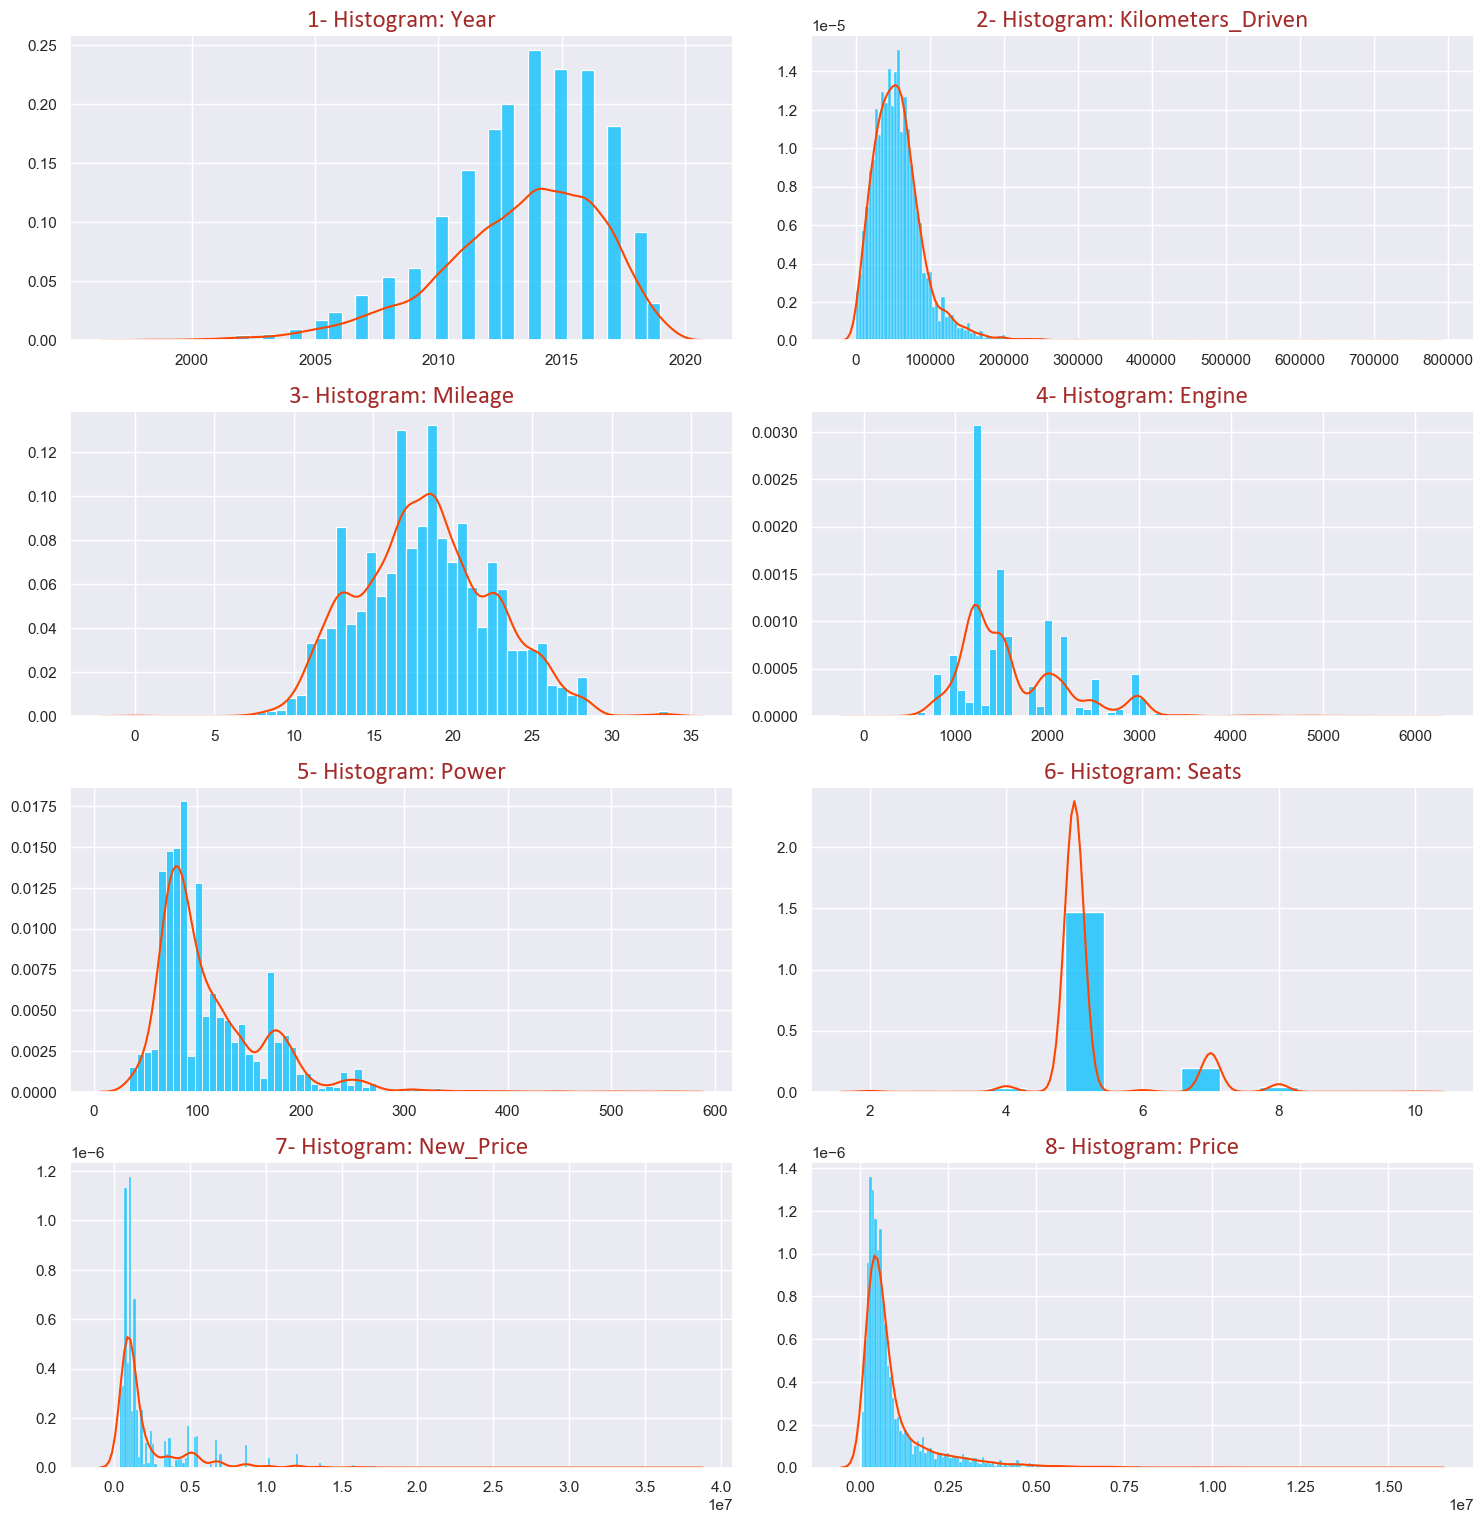

In [65]:
'''
To start building our model, we must first filter the Numerical Columns, the plot a Histograms to find out the Heavily
Skewed Columns that need to be transformed using Log Transformation:
'''

df.drop(['Origin'] , axis = 1 , inplace=True)

num_columns = [item for item in df.select_dtypes(include=np.number).columns if 'tag' not in item]

plt.figure(figsize=(15 , 45))

for i in range(len(num_columns)):
    plt.subplot(12 , 2 , i + 1)
    title = str(i+1) + '- Histogram: ' + num_columns[i]
    font = {'size': 18 , 'fontname':'Calibri' , 'color':'brown'}
    sns.histplot(df[num_columns[i]] , color='deepskyblue' , stat='density').set_title(title , fontdict=font)
    sns.kdeplot(df[num_columns[i]] , color='orangered')
    plt.xlabel('')
    plt.ylabel('')
    plt.tight_layout()    

plt.show()

In [66]:
'''
As shown in the above Histograms, both Year and Mileage Columns have semi Normal Distributions; Also, Seats Column has a diecrete Values.
In order to proceed with our model building, we have to drop these columns before transformming the rest of num_columns
using the Log Transformation to reduce their right shewness:
'''

df_log = df.copy()    # To avoid modifying the original Dataset.
num_columns.remove('Year')
num_columns.remove('Mileage')
num_columns.remove('Seats')

for column in num_columns:
    df_log[column + '_log'] = np.log(df_log[column]+1)

df_log.drop(num_columns , axis=1 , inplace=True)
df_log.head()

,Location,Year,Fuel_Type,Transmission,Owner_Type,Mileage,Seats,Brand,Kilometers_Driven_log,Engine_log,Power_log,New_Price_log,Price_log
0,Mumbai,2010,CNG,Manual,First,26.60,5.0,Maruti,11.184435,6.906755,4.080246,13.219492,12.072547
1,Pune,2015,Diesel,Manual,First,19.67,5.0,Hyundai,10.621352,7.367077,4.845761,14.289258,14.038655
2,Chennai,2011,Petrol,Manual,First,18.20,5.0,Honda,10.736418,7.090077,4.496471,13.665851,13.017005
3,Chennai,2012,Diesel,Manual,First,20.77,7.0,Maruti,11.373675,7.130099,4.497139,13.935071,13.304687
4,Coimbatore,2013,Diesel,Automatic,Second,15.20,5.0,Audi,10.613271,7.585281,4.954418,15.485856,14.388748


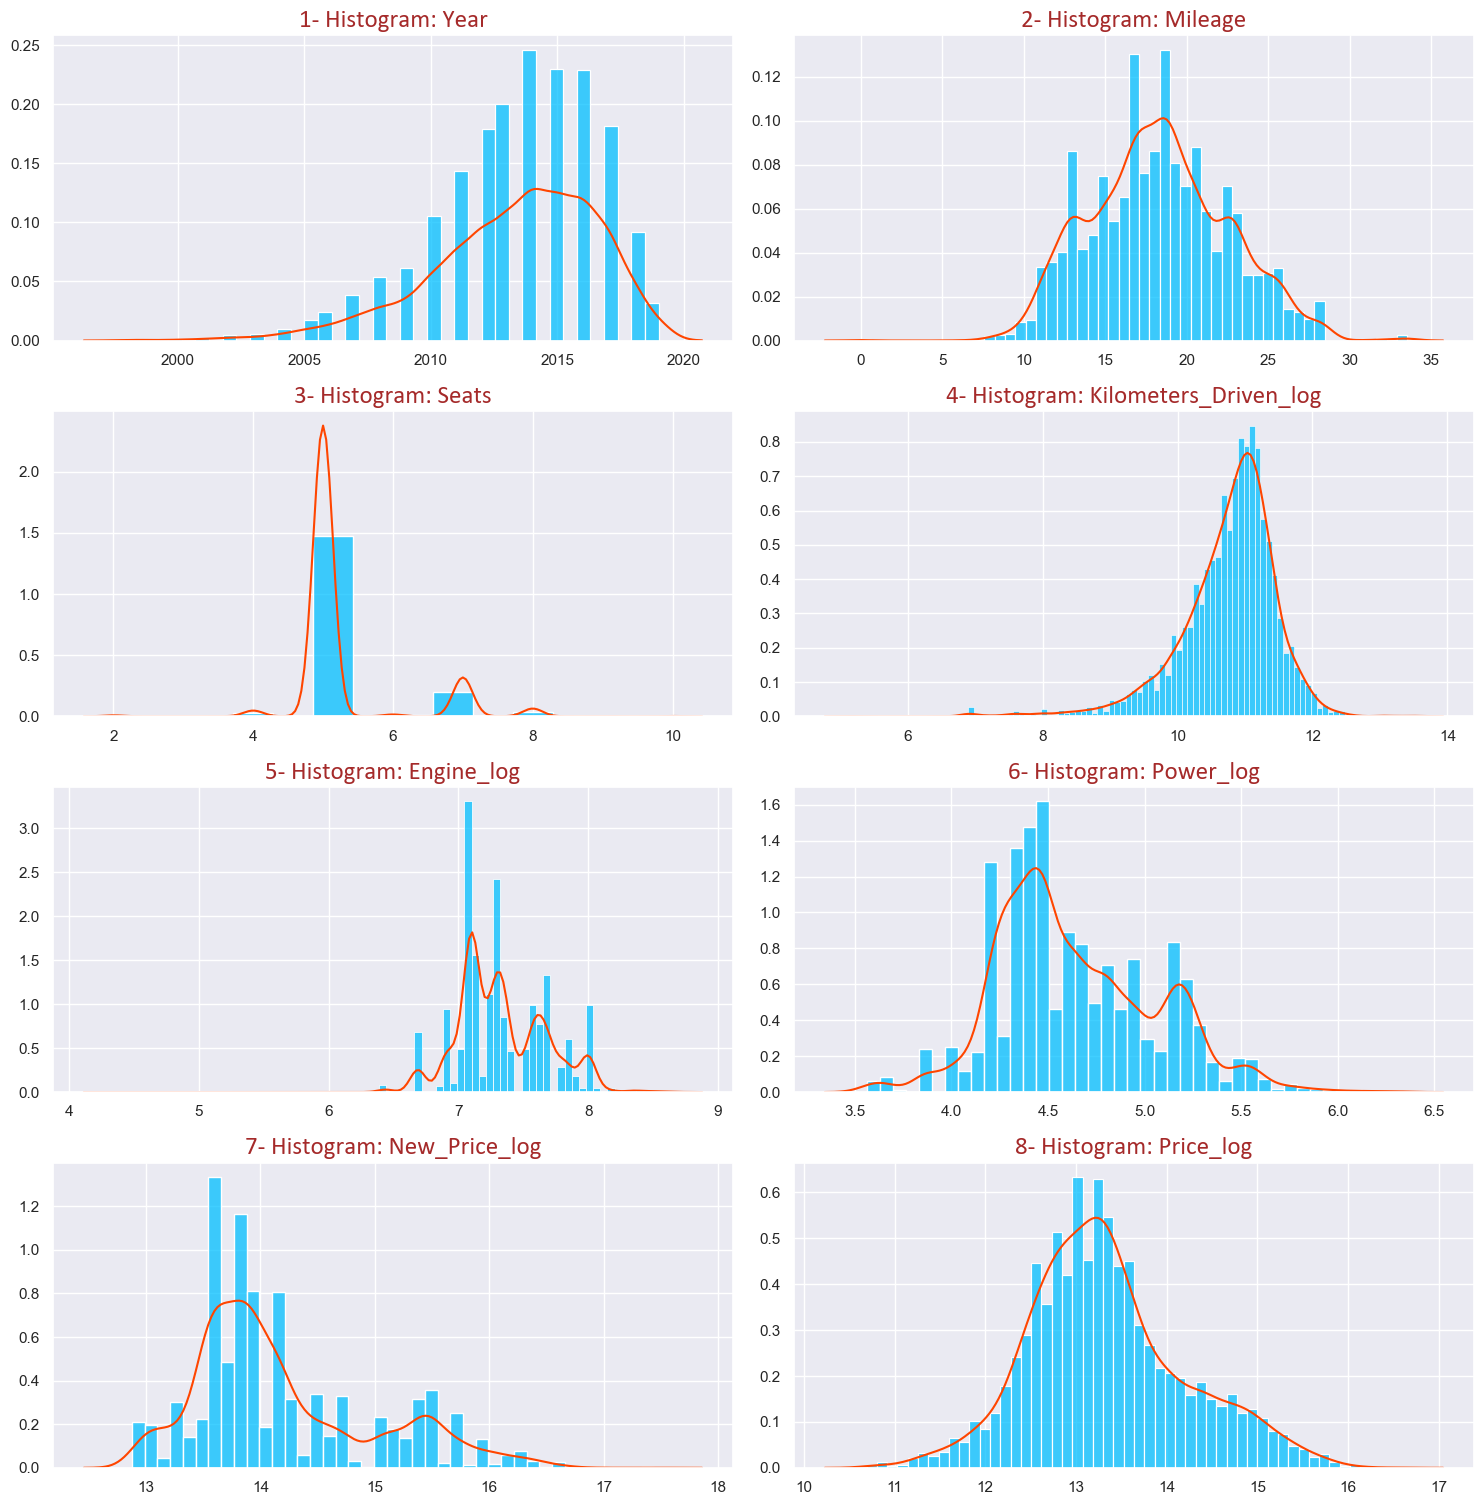

In [67]:
# Recreating the Numerical Column List, then replotting the Histograms after Log Transformation

num_columns = [item for item in df_log.select_dtypes(include=np.number).columns if 'tag' not in item]

plt.figure(figsize=(15 , 45))

for i in range(len(num_columns)):
    plt.subplot(12 , 2 , i + 1)
    title = str(i+1) + '- Histogram: ' + num_columns[i]
    font = {'size': 18 , 'fontname':'Calibri' , 'color':'brown'}
    sns.histplot(df_log[num_columns[i]] , color='deepskyblue' , stat='density').set_title(title , fontdict=font)
    sns.kdeplot(df_log[num_columns[i]] , color='orangered')
    plt.xlabel('')
    plt.ylabel('')
    plt.tight_layout()    

plt.show()


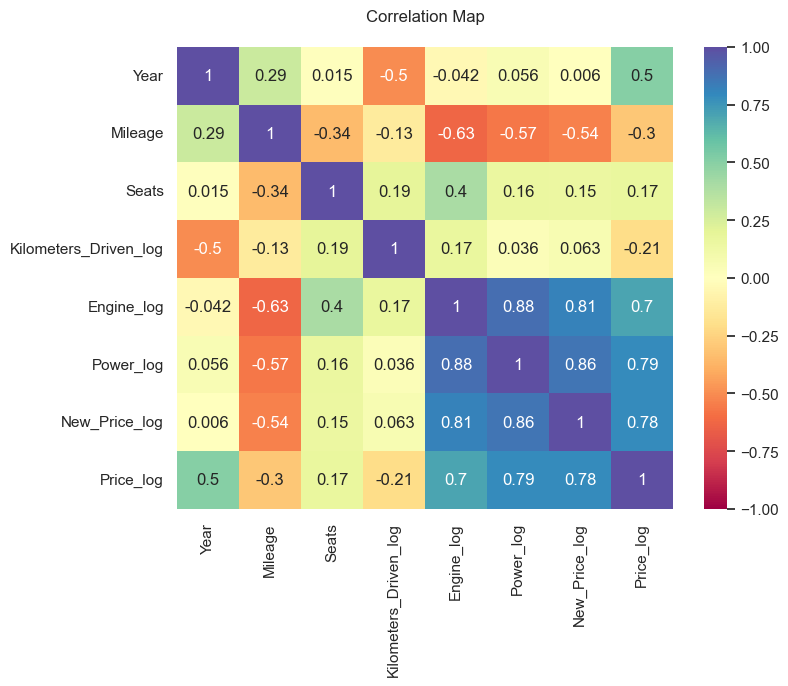

In [68]:
'''A quite improvement has been achieved by reducing the skewness in Numeric Columns!
Lets now plot a Heatmap to discover existing correlations again after Log Transformation:
'''

plt.figure(figsize=(8, 6))
sns.heatmap(data=df_log.corr(), annot=True, vmin=-1, vmax=1, cmap='Spectral')
plt.title('Correlation Map\n')
plt.show();

<left> <font size=5 style='font-family:Courier New' color='Grey'> **8.1 Observations:**
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **1.** It's fair to say that correlation is expected, it's a part of Dataset nature!
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **2.** Although of some increments in correlation coefficients, Features are still correlated in meaningful and reasonable mechanism.

In [69]:
# Log Transformation is done, it's the time to segregate the Dataset into Predictors (Independent) and Target (Dependent) Variables:

predictors = df_log.drop(['Price_log'] , axis=1)
target = df_log['Price_log']

In [70]:
# Create Dummy Variables for all Columns with Object/Category Data Types then view the Dataset after such creation:

predictors = pd.get_dummies(predictors , columns=predictors.select_dtypes(include=['object', 'category']).columns.tolist() , drop_first=True)
predictors.head()

,Year,Mileage,Seats,Kilometers_Driven_log,Engine_log,Power_log,New_Price_log,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third,Brand_Audi,Brand_Bentley,Brand_Bmw,Brand_Chevrolet,Brand_Datsun,Brand_Fiat,Brand_Force,Brand_Ford,Brand_Honda,Brand_Hyundai,Brand_Isuzu,Brand_Jaguar,Brand_Jeep,Brand_Lamborghini,Brand_Land Rover,Brand_Mahindra,Brand_Maruti,Brand_Mercedes,Brand_Mini Cooper,Brand_Mitsubishi,Brand_Nissan,Brand_Porsche,Brand_Renault,Brand_Skoda,Brand_Smart,Brand_Tata,Brand_Toyota,Brand_Volkswagen,Brand_Volvo
0,2010,26.60,5.0,11.184435,6.906755,4.080246,13.219492,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,2015,19.67,5.0,10.621352,7.367077,4.845761,14.289258,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2011,18.20,5.0,10.736418,7.090077,4.496471,13.665851,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2012,20.77,7.0,11.373675,7.130099,4.497139,13.935071,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,2013,15.20,5.0,10.613271,7.585281,4.954418,15.485856,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [71]:
# Spliiting the Dataset into Training/Testing Subsets using 70%-30%:

predictors_train , predictors_test , target_train , target_test = train_test_split(predictors , target , test_size=0.3 , random_state=1)
print('\033[1m', '\033[92m', 'Number of Data Rows in Train Subset =' , predictors_train.shape[0])
print('\033[1m', '\033[92m', 'Number of Data Rows in Testing Subset =' , predictors_test.shape[0])

  Number of Data Rows in Train Subset = 4213
  Number of Data Rows in Testing Subset = 1806


In [72]:
# Almost done, let's now fit out Model:

linear_model = LinearRegression()
linear_model.fit(predictors_train , target_train);

In [73]:
'''
Lets create customized functions to calculate the below metrics:
1. Root Mean Square Error - RMSE.
2. Mean Absolute Error - MAE.
3. R-Squared. - R2
3. Adjusted R-Squared - Adj. R2.
4. Mean Absolute Percentage Error - MAPE.
'''

def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))

def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100

def model_performance_regression(model, predictors, target):
    pred = model.predict(predictors)
    r2 = r2_score(target, pred)
    adjr2 = adj_r2_score(predictors, target, pred)
    rmse = np.sqrt(mean_squared_error(target, pred))
    mae = mean_absolute_error(target, pred)
    mape = mape_score(target, pred)
    df_perf = pd.DataFrame({'RMSE':rmse , 'MAE':mae , 'R-squared':r2 ,'Adj. R-squared':adjr2 , 'MAPE': mape} , index=[0])
    return df_perf

In [74]:
# Checking the Model performance on Training Subset:
print('\033[1m' , '\033[92m' , 'Training Performance Metrics:' , '\033[0m', '\033[92m')
train_metrics = model_performance_regression(linear_model, predictors_train, target_train)
print(train_metrics.to_string(index=False))

  Training Performance Metrics:  
    RMSE      MAE  R-squared  Adj. R-squared     MAPE
0.213417 0.154899   0.940136        0.939359 1.169626


In [75]:
# Checking the Model performance on Testing Subset:
print('\033[1m' , '\033[92m' , 'Testing Performance Metrics:' , '\033[0m', '\033[92m')
test_metrics = model_performance_regression(linear_model, predictors_test, target_test)
print(test_metrics.to_string(index=False))

  Testing Performance Metrics:  
    RMSE      MAE  R-squared  Adj. R-squared     MAPE
0.203614 0.152118    0.94616        0.944499 1.149514


<left> <font size=5 style='font-family:Courier New' color='Grey'> **8.2 Observations:**
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **1.** The Train (In-Sample) and Test (Out-Of-Sample) **R-Squared** are 0.940 and 0.946 respectively. Thus, Our Linear Regression Model can explain 94.0% of the Training Subset and 94.6% of the testing Subset.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **2.** RMSE values for the Training/Testing Subsets are comparable.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **3.** We were able to generate a Linear Regression Model that is not Overfitting.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **4.** MAE indicates that our model is able to predict Cars Price within a Mean Error of 0.1549 / 0.1521 on the Training/Testing Substes.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **5.** MAPE indicates that our model is able to predict Cars Price within 1.17% / 1.15% on the Training/Testing Substes.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **6.** The overall performance is excellent; Also, the decreasing of **Adj. R^2** indicates that adding new variables was not valuable.

In [76]:
'''
One last step!
Let's find the Metrics of our Linear Regression Model without the Log Transformation of the Price (Dependent) Column:
'''

df_log_p = df.copy()

num_columns = [item for item in df.select_dtypes(include=np.number).columns if 'tag' not in item]

num_columns.remove('Year')
num_columns.remove('Mileage')
num_columns.remove('Seats')
num_columns.remove('Price')

for column in num_columns:
    df_log_p[column + '_log'] = np.log(df_log_p[column] + 1)

df_log_p.drop(num_columns , axis=1 , inplace=True)

predictors = df_log_p.drop(['Price'] , axis=1)
target = df_log_p['Price']

predictors = pd.get_dummies(predictors , columns=predictors.select_dtypes(include=['object', 'category']).columns.tolist() , drop_first=True)

linear_model = LinearRegression()
linear_model.fit(predictors_train , target_train);

print('\033[1m' , '\033[92m' , 'Training Performance Metrics:' , '\033[0m', '\033[92m')
train_metrics = model_performance_regression(linear_model, predictors_train, target_train)
print(train_metrics.to_string(index=False))
print()
print('\033[1m' , '\033[92m' , 'Testing Performance Metrics:' , '\033[0m', '\033[92m')
test_metrics = model_performance_regression(linear_model, predictors_test, target_test)
print(test_metrics.to_string(index=False))

  Training Performance Metrics:  
    RMSE      MAE  R-squared  Adj. R-squared     MAPE
0.213417 0.154899   0.940136        0.939359 1.169626

  Testing Performance Metrics:  
    RMSE      MAE  R-squared  Adj. R-squared     MAPE
0.203614 0.152118    0.94616        0.944499 1.149514


<left> <font size=5 style='font-family:Courier New' color='Grey'> **8.3 Observations:**
<br> <left> <font size=3 style='font-family:Courier New' color='black'> As seen, the Log Transformation of Variable has no effect on the Performance Metrics, it just helps in reduce the heavy skewness making the plot more understandable!

In [77]:
# Optionally, let's view the Model's Equation, Intercept, Coefficients, and find its results:

print('\033[1m' , '\033[92m', '1. Linear Regression Model Equation:')
print('\033[0m' , '\033[92m' , 'Price' , '\033[1m' , '=' , '{:.5f}'.format(round(linear_model.intercept_,5)) , 
      '\033[0m')

for i in range(len(predictors_train.columns)):
    if i != len(predictors_train.columns) - 1:
        if linear_model.coef_[i] > 0:
            print('\033[1m' , '\033[92m' , '+' , '{:.5f}'.format(+1 * round(linear_model.coef_[i],5)) , 
                  '\033[0m' , '\033[92m' , '*' ,  predictors_train.columns[i])
        elif linear_model.coef_[i] < 0:
            print('\033[1m' , '\033[92m' , '-' , '{:.5f}'.format(-1 * round(linear_model.coef_[i],5)) , 
                  '\033[0m' , '\033[92m' , '*' ,  predictors_train.columns[i])

    else:
        if linear_model.coef_[i] > 0:
            print('\033[1m' , '\033[92m' , '+' , '{:.5f}'.format(+1 * round(linear_model.coef_[i],5)) , 
                  '\033[0m' , '\033[92m' , '*' ,  predictors_train.columns[i])
        elif linear_model.coef_[i] < 0:
            print('\033[1m' , '\033[92m' , '-' , '{:.5f}'.format(-1 * round(linear_model.coef_[i],5)) , 
                  '\033[0m' , '\033[92m' , '*' ,  predictors_train.columns[i])

 
print()      
print('\033[1m' , '\033[92m', '2. Linear Regression Model Intercept:' , '\033[0m' , '\033[92m')
print(linear_model.intercept_ , '\n')

print('\033[1m' , '\033[92m' , '3. Linear Regression Model Coefficients:' , '\033[0m' , '\033[92m')
print(linear_model.coef_ , '\n')

target_pred = linear_model.predict(predictors_test)
df_log_pred = pd.DataFrame({'Actual': target_test.squeeze(), 'Predicted': target_pred.squeeze()})
print('\033[1m' , '\033[92m' , '4. Linear Regression Model Results:' , '\033[0m' , '\033[92m')
print(df_log_pred)

  1. Linear Regression Model Equation:
  Price  = -222.03202 
  + 0.11343   * Year
  - 0.00628   * Mileage
  + 0.02761   * Seats
  - 0.08229   * Kilometers_Driven_log
  + 0.16995   * Engine_log
  + 0.65579   * Power_log
  + 0.28919   * New_Price_log
  + 0.18024   * Location_Bangalore
  + 0.04559   * Location_Chennai
  + 0.13107   * Location_Coimbatore
  - 0.07072   * Location_Delhi
  + 0.14398   * Location_Hyderabad
  - 0.03055   * Location_Jaipur
  - 0.01999   * Location_Kochi
  - 0.21811   * Location_Kolkata
  - 0.05439   * Location_Mumbai
  - 0.02812   * Location_Pune
  + 0.08132   * Fuel_Type_Diesel
  + 0.81468   * Fuel_Type_Electric
  + 0.03979   * Fuel_Type_LPG
  - 0.10607   * Fuel_Type_Petrol
  - 0.08218   * Transmission_Manual
  + 0.01727   * Owner_Type_Fourth & Above
  - 0.06153   * Owner_Type_Second
  - 0.16932   * Owner_Type_Third
  - 0.25486   * Brand_Audi
  + 0.20182   * Brand_Bentley
  - 0.28266   * Brand_Bmw
  - 0.84254   * Brand_Chevrolet
  - 0.77585   * Brand_Datsun
  